# BMedicalconditions


Analizamos una base de datos del estudio "SEVERE HYPOGLYCEMIA IN  OLDER ADULTS WITH TYPE 1 DIABETES, A Study to Identify Factors Associated  with the Occurrence of Severe Hypoglycemia in Older Adults with T1D" 
Recordemos que la hipoglicemia son niveles bajos de azúcar en sangre.

Abordamos un problema de clasificación que nuestra salida será si es un paciente caso o control 
 - Caso. evento SH (Severe Hipoglucemia) en los últimos 12 meses
 - Control . NO SH en los últimos 3 años.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib


from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score


from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

In [2]:
data = pd.read_csv("MedCondition.csv", encoding = "utf8", sep =";") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
data.head() # Muestra las primeras 5 filas



,RecID,PtID,MCLLTReal,MedCondTrt
0,1,36,Chronic kidney disease,None
1,2,36,Hypertension,None
2,3,36,Hypothyroidism,Medication
3,4,36,Diabetic peripheral neuropathy,None
4,5,36,Depression,Medication


In [3]:
#Cargamos la base de datos y la guardamos en un dataframe
roster = pd.read_csv("BPtRoster.csv") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
roster.head() # Muestra las primeras 5 filas

,RecID,PtID,BCaseControlStatus
0,6,199,Case
1,8,194,Case
2,9,56,Control
3,10,201,Case
4,11,107,Control


In [4]:
data_new = pd.merge(roster,data , on = "PtID")
data_new.head()

,RecID_x,PtID,BCaseControlStatus,RecID_y,MCLLTReal,MedCondTrt
0,6,199,Case,78,Chronic kidney disease,None
1,6,199,Case,79,Coronary artery disease,Surgery
2,9,56,Control,161,Congestive heart failure,Medication and Surgery
3,9,56,Control,162,Proliferative diabetic retinopathy,None
4,9,56,Control,163,Peripheral neuropathy NOS,None


In [20]:
data_new2 = data_new.drop(columns = ["RecID_x", "PtID", "RecID_y"]) 
data_new2.head()

,BCaseControlStatus,MCLLTReal,MedCondTrt
0,Case,Chronic kidney disease,None
1,Case,Coronary artery disease,Surgery
2,Control,Congestive heart failure,Medication and Surgery
3,Control,Proliferative diabetic retinopathy,None
4,Control,Peripheral neuropathy NOS,None


# Representación

In [6]:
data_new2.replace({"MedCondTrt": "Dietary Management"}, "Diet", inplace = True)
data_new2.replace({"MedCondTrt": "Medication"}, "Med", inplace = True)
data_new2.replace({"MedCondTrt": "Medication and Surgery"}, "Med/Su", inplace = True)
data_new2.replace({"MedtCondTrt": "None"}, "Non", inplace = True)
data_new2.replace({"MedtCondTrt": "Other"}, "Oth", inplace = True)
data_new2.replace({"MedtCondTrt": "Surgery"}, "Surg", inplace = True)
data_new2.replace({"MedtCondTrt": "Unknown"}, "Unk", inplace = True)

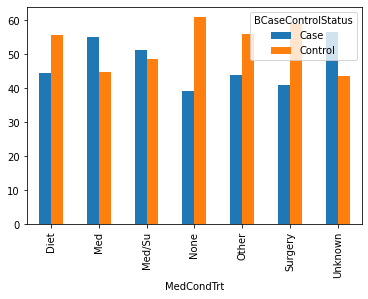

In [7]:
plot = pd.crosstab(index=data_new2["MedCondTrt"],
            columns=data_new2['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')


Como podemos observar a muchos pacientes que están repetidos, es decir, cuentan con más de una enfermedad.
Procedmos a contar la ocurrencia de las diferentes enfermedades.

In [11]:
a = data[["MCLLTReal","MedCondTrt"]].value_counts()

a_df = pd.DataFrame(a)


df = pd.DataFrame(a)
print(df)
#b = df[df["0"]!=1]

#df[df["0"] != 1]

                             0
MCLLTReal      MedCondTrt     
Hypertension   Medication  114
Hyperlipidemia Medication   63
Hypothyroidism Medication   53
Depression     Medication   29
Dyslipidemia   Medication   24
...                        ...
Gout           Unknown       1
               None          1
               Medication    1
Goiter         Unknown       1
Hypoglycemia   Other         1

[409 rows x 1 columns]


In [12]:
data["MCLLTReal"].value_counts().reset_index()

,index,MCLLTReal
0,Hypertension,125
1,Hyperlipidemia,72
2,Hypothyroidism,55
3,Depression,38
4,Coronary artery disease,37
...,...,...
250,Chest pain,1
251,Implantable defibrillator insertion,1
252,Hyperthyroidism,1
253,Memory deficit,1


In [13]:
m_count = np.array(data["MCLLTReal"].value_counts().reset_index())

In [14]:
m_count_1 = m_count[m_count[:,1]==1]
m_count_2 = m_count[m_count[:,1]==2]
m_count_3 = m_count[m_count[:,1]==3]

In [15]:
v_count_all = np.concatenate((m_count_1[:,0], m_count_2[:,0], m_count_3[:,0] ))

In [16]:
v_intersect = np.intersect1d(m_count_1[:,0], data["MCLLTReal"].values)

In [17]:
df_real_patients = data[~data['MCLLTReal'].isin(v_count_all)]

In [18]:
df_real_patients

,RecID,PtID,MCLLTReal,MedCondTrt
0,1,36,Chronic kidney disease,None
1,2,36,Hypertension,None
2,3,36,Hypothyroidism,Medication
3,4,36,Diabetic peripheral neuropathy,None
4,5,36,Depression,Medication
...,...,...,...,...
1132,1133,133,Type I diabetes mellitus,Medication
1133,1134,133,Coronary artery disease,Medication
1134,1135,133,Hypertension,Medication
1136,1137,133,Breast cancer,Surgery


In [19]:
df_real_patients["MedCondTrt"] = df_real_patients["MedCondTrt"].replace(["Other", "Unknown"],["Other","Other"])

<ipython-input-19-82ccfe8d0cb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_patients["MedCondTrt"] = df_real_patients["MedCondTrt"].replace(["Other", "Unknown"],["Other","Other"])


In [21]:
df_real_patients.head()

,RecID,PtID,MCLLTReal,MedCondTrt
0,1,36,Chronic kidney disease,None
1,2,36,Hypertension,None
2,3,36,Hypothyroidism,Medication
3,4,36,Diabetic peripheral neuropathy,None
4,5,36,Depression,Medication


In [22]:
enfer_list = []
medic_list = []
lenght_list = []
for a in df_real_patients["PtID"].value_counts().index.to_list():
    enfer = df_real_patients[df_real_patients["PtID"]==a]["MCLLTReal"].to_list()
    medic = df_real_patients[df_real_patients["PtID"]==a]["MedCondTrt"].to_list()
    enfer_list.append(enfer)
    medic_list.append(medic)
    lenght_list.append(len(enfer))
    
data_1 = pd.DataFrame()
data_1["PtID"] = df_real_patients["PtID"].value_counts().index.to_list()
data_1["new enferme"] = enfer_list
data_1["new medic"] = medic_list
data_1["lenght"] = lenght_list
data_1 = data_1.sort_values("PtID", ascending = True)
data_1.index = range(0, len(data_1["PtID"].to_list()),1)

data_1

,PtID,new enferme,new medic,lenght
0,1,"[Hyperlipidemia, Hypertension]","[Medication, None]",2
1,2,"[Type I diabetes mellitus, Depression, Catarac...","[Medication, Medication, Surgery, Surgery]",4
2,3,"[Hypertension, Hyperlipidemia, Hypothyroidism,...","[Medication, Medication, Medication, Other]",4
3,4,"[Dyslipidemia, Hypothyroidism, Vitamin B12 def...","[Medication, Medication, Medication]",3
4,5,"[Hypertension, Depression, Dyslipidemia, Coron...","[Medication, None, Medication, None, Medicatio...",9
...,...,...,...,...
189,199,"[Chronic kidney disease, Coronary artery disease]","[None, Surgery]",2
190,200,"[Coronary artery disease, Hyperlipidemia, Hype...","[Medication and Surgery, Medication, Medication]",3
191,201,[Chronic kidney disease],[None],1
192,202,"[Coronary artery disease, Cataract, Hypertensi...","[Medication and Surgery, Surgery, Medication, ...",5


In [23]:
#Realizamos One hot Encoding
data_e = pd.DataFrame()
data_e["PtID"] = data_1["PtID"]
data_e["conds"] = data_1["new enferme"]

cond_list = df_real_patients["MCLLTReal"].value_counts().index.to_list()

for cond in cond_list:
    data_e[cond] = [1 if cond in data_1["new enferme"].to_list()[id] else 0 for id in data_1.index.to_list()]

data_e

,PtID,conds,Hypertension,Hyperlipidemia,Hypothyroidism,Depression,Coronary artery disease,Diabetic peripheral neuropathy,Dyslipidemia,Proliferative diabetic retinopathy,...,Coronary stent placement,Renal insufficiency,Rheumatoid arthritis,Spinal stenosis of unspecified region,Knee surgery NOS,Restless leg syndrome,Breast cancer,Ulcerative colitis,Celiac disease,Gastroparesis
0,1,"[Hyperlipidemia, Hypertension]",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,"[Type I diabetes mellitus, Depression, Catarac...",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,"[Hypertension, Hyperlipidemia, Hypothyroidism,...",1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,"[Dyslipidemia, Hypothyroidism, Vitamin B12 def...",0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,"[Hypertension, Depression, Dyslipidemia, Coron...",1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,199,"[Chronic kidney disease, Coronary artery disease]",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190,200,"[Coronary artery disease, Hyperlipidemia, Hype...",1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,201,[Chronic kidney disease],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,202,"[Coronary artery disease, Cataract, Hypertensi...",1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Cargamos la base de datos y la guardamos en un dataframe
roster = pd.read_csv("BPtRoster.csv") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
roster.head() # Muestra las primeras 5 filas

,RecID,PtID,BCaseControlStatus
0,6,199,Case
1,8,194,Case
2,9,56,Control
3,10,201,Case
4,11,107,Control


In [25]:
data_new = pd.merge(roster,data_e , on = "PtID")
data_new.head()

,RecID,PtID,BCaseControlStatus,conds,Hypertension,Hyperlipidemia,Hypothyroidism,Depression,Coronary artery disease,Diabetic peripheral neuropathy,...,Coronary stent placement,Renal insufficiency,Rheumatoid arthritis,Spinal stenosis of unspecified region,Knee surgery NOS,Restless leg syndrome,Breast cancer,Ulcerative colitis,Celiac disease,Gastroparesis
0,6,199,Case,"[Chronic kidney disease, Coronary artery disease]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9,56,Control,"[Congestive heart failure, Proliferative diabe...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,201,Case,[Chronic kidney disease],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,107,Control,"[Hypothyroidism, Chronic kidney disease]",0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,47,Case,"[Coronary stent placement, Hypothyroidism, Dep...",0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
data_new2 = data_new.drop(columns = ["RecID", "PtID", "conds"]) 
data_new2.head()

,BCaseControlStatus,Hypertension,Hyperlipidemia,Hypothyroidism,Depression,Coronary artery disease,Diabetic peripheral neuropathy,Dyslipidemia,Proliferative diabetic retinopathy,Chronic kidney disease,...,Coronary stent placement,Renal insufficiency,Rheumatoid arthritis,Spinal stenosis of unspecified region,Knee surgery NOS,Restless leg syndrome,Breast cancer,Ulcerative colitis,Celiac disease,Gastroparesis
0,Case,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Control,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Case,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Control,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Case,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [27]:
data_input = data_new.drop(columns = ["RecID", "PtID", "BCaseControlStatus", "conds"])
data_input.head()

,Hypertension,Hyperlipidemia,Hypothyroidism,Depression,Coronary artery disease,Diabetic peripheral neuropathy,Dyslipidemia,Proliferative diabetic retinopathy,Chronic kidney disease,Osteoporosis,...,Coronary stent placement,Renal insufficiency,Rheumatoid arthritis,Spinal stenosis of unspecified region,Knee surgery NOS,Restless leg syndrome,Breast cancer,Ulcerative colitis,Celiac disease,Gastroparesis
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
data_output_borrar = data_new["BCaseControlStatus"]
data_output = data_output_borrar.replace("Case",1).replace("Control",0)

In [29]:
data_output.head()

0    1
1    0
2    1
3    0
4    1
Name: BCaseControlStatus, dtype: int64

## Gráfico de barras en función de la salida

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


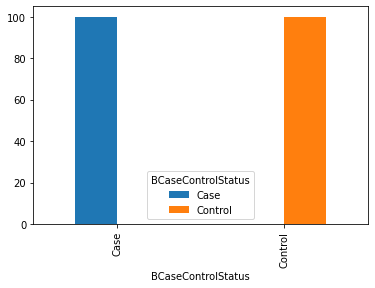

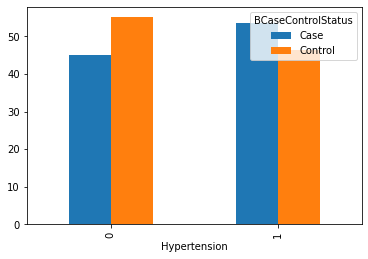

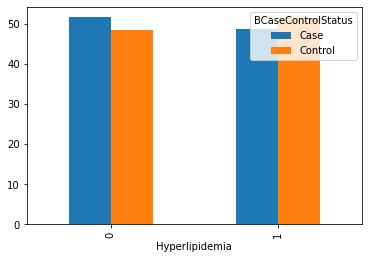

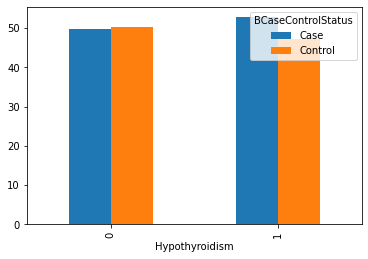

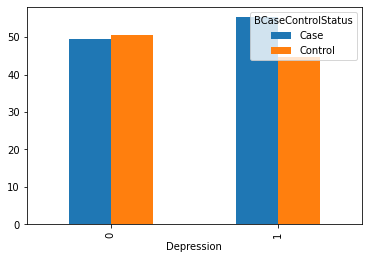

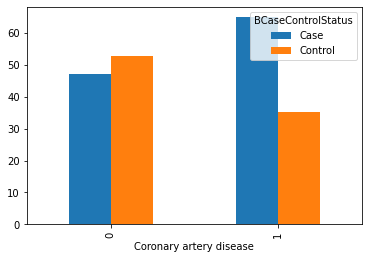

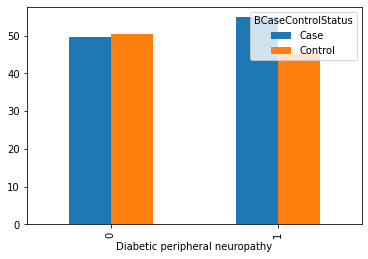

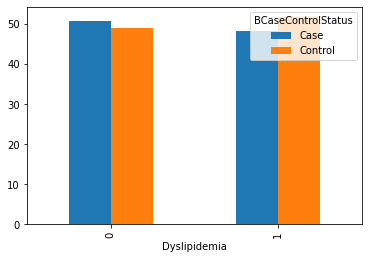

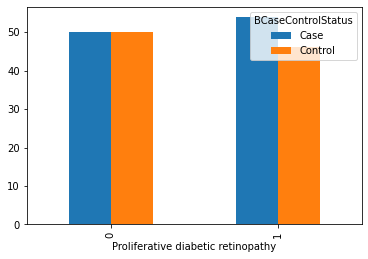

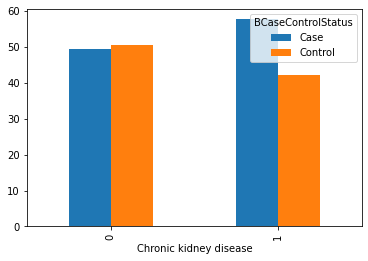

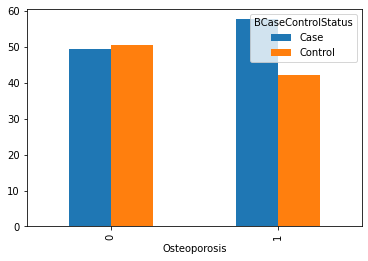

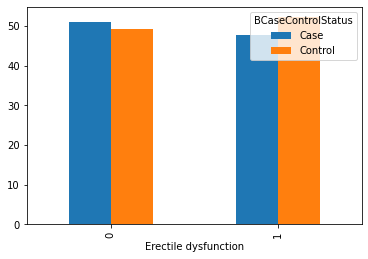

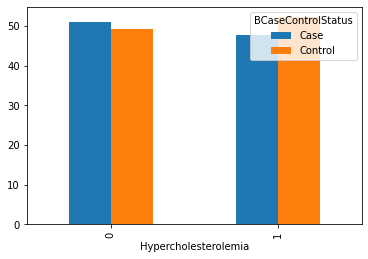

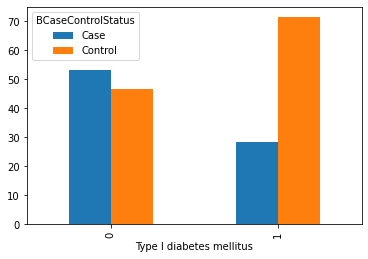

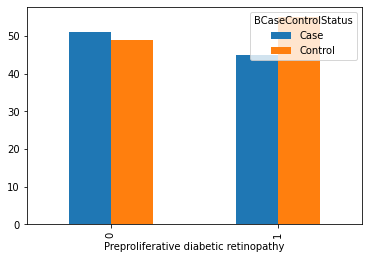

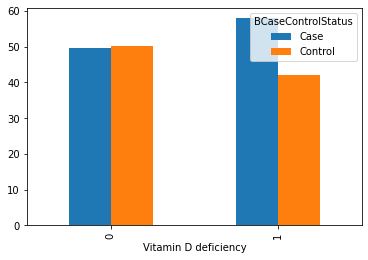

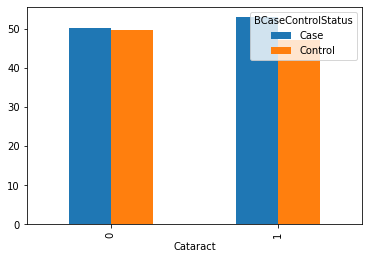

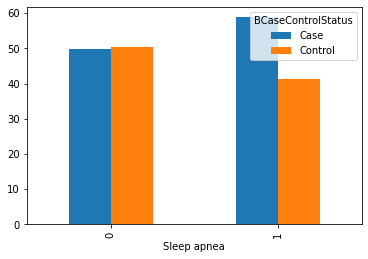

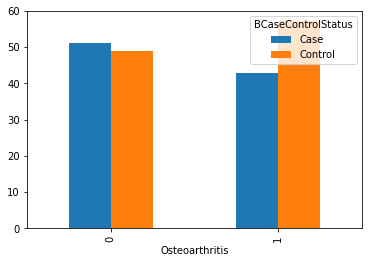

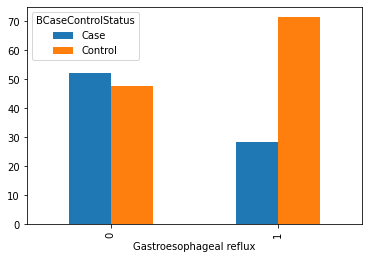

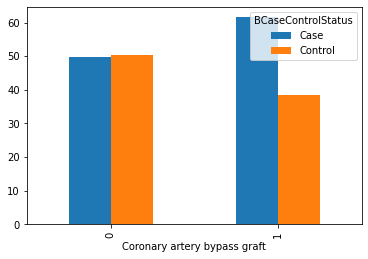

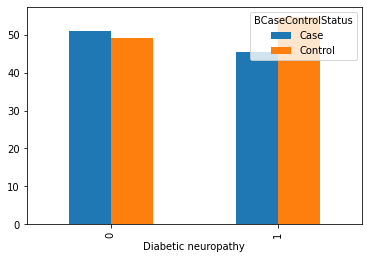

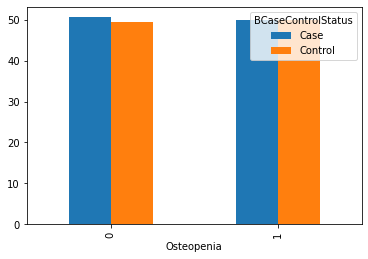

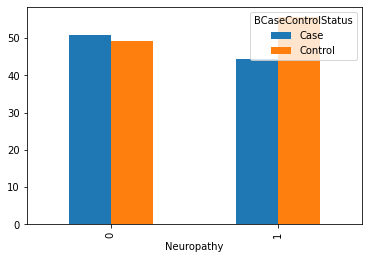

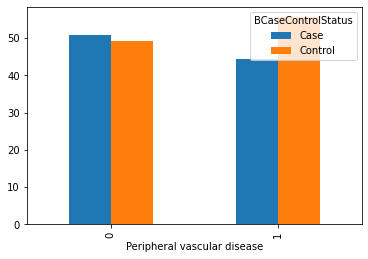

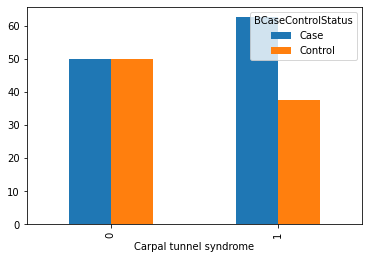

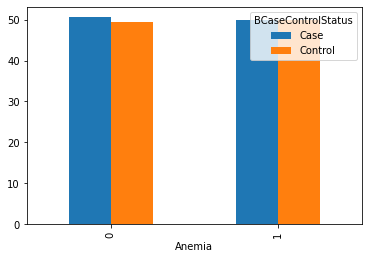

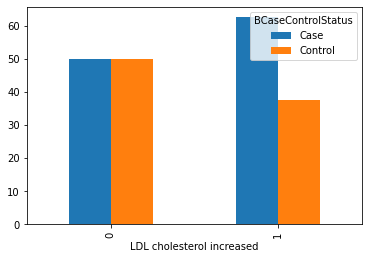

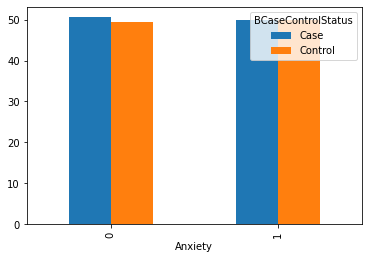

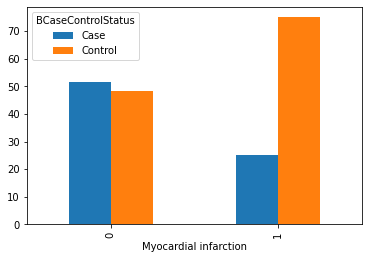

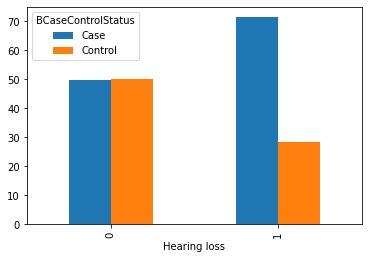

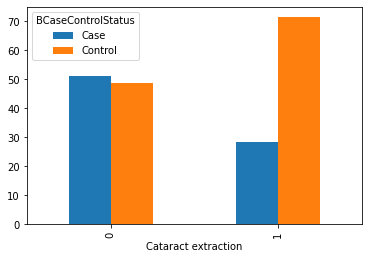

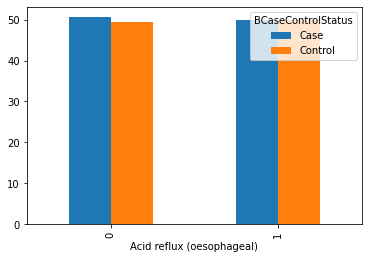

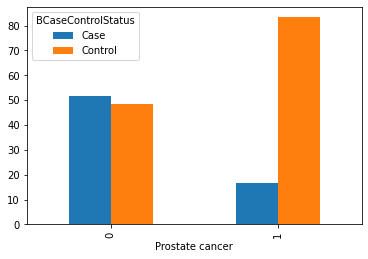

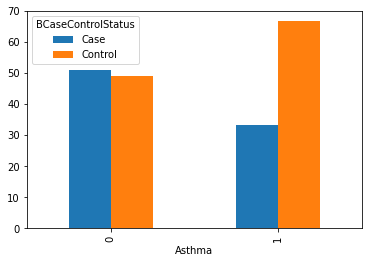

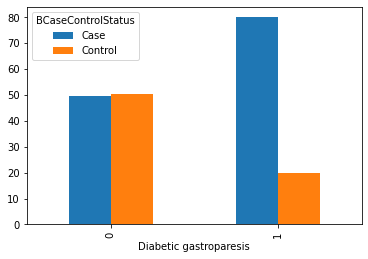

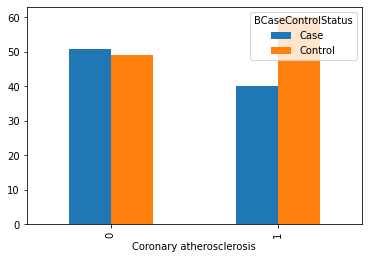

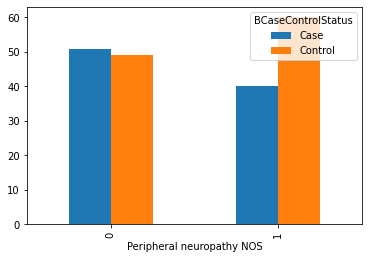

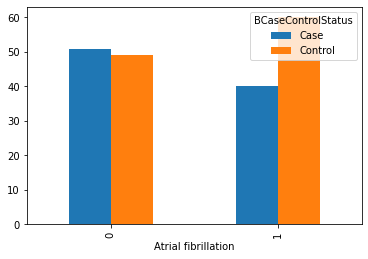

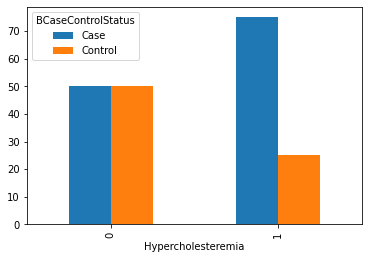

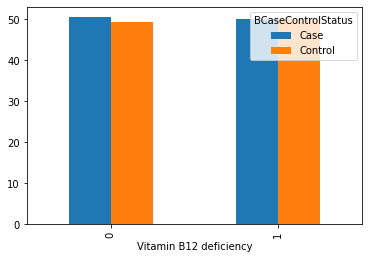

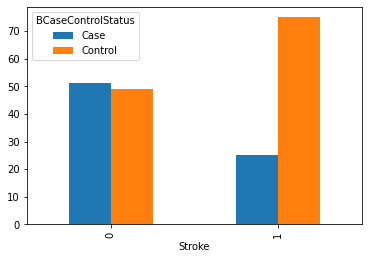

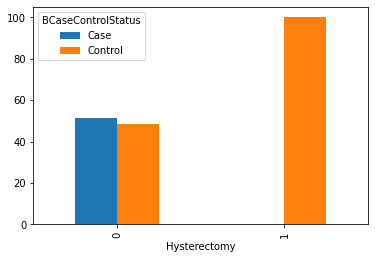

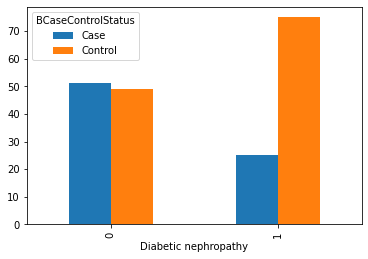

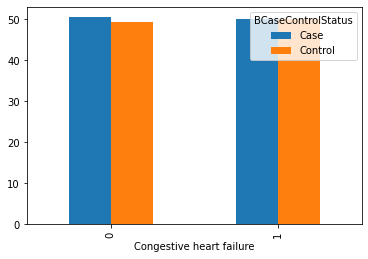

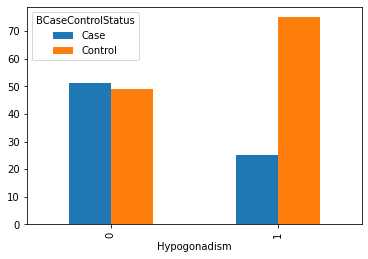

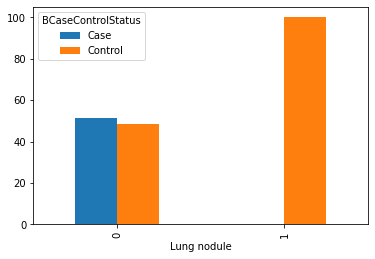

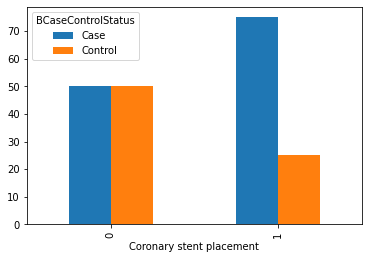

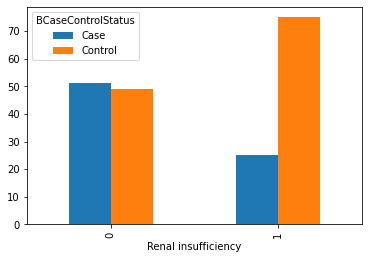

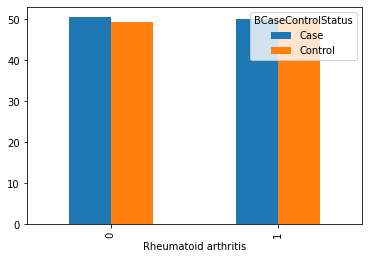

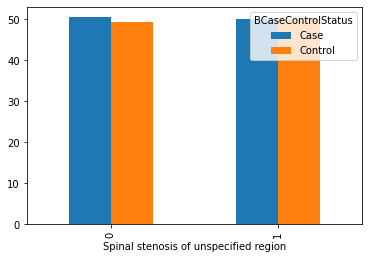

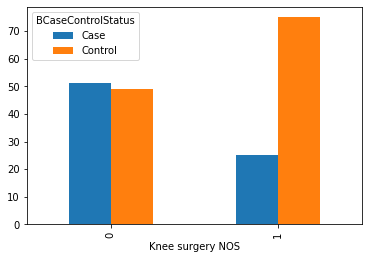

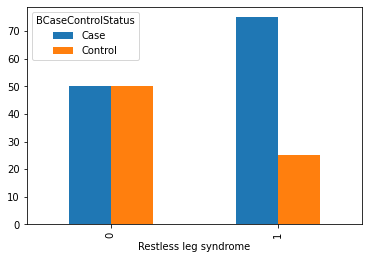

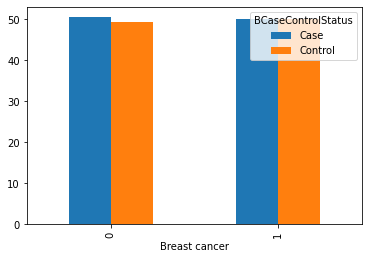

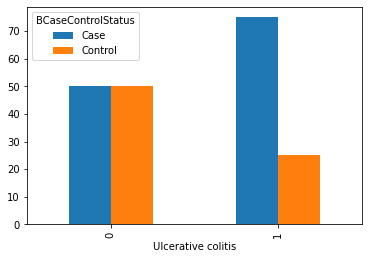

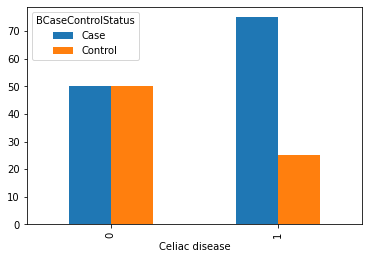

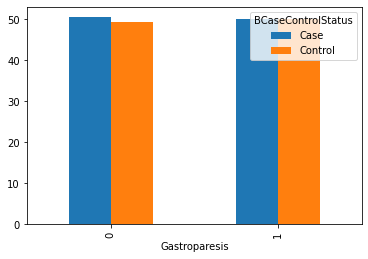

In [30]:
for element in data_new2.columns:
    
    plot = pd.crosstab(index=data_new2[element],
            columns=data_new2['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

In [31]:
plt.figure(figsize=(40,10))
data["MCLLTReal"].value_counts().plot(kind = "bar")
plt.savefig("enf.pdf")
plt.close()



# Preprocesado 

### Eliminar Outliers

In [32]:
data_input.head()

,Hypertension,Hyperlipidemia,Hypothyroidism,Depression,Coronary artery disease,Diabetic peripheral neuropathy,Dyslipidemia,Proliferative diabetic retinopathy,Chronic kidney disease,Osteoporosis,...,Coronary stent placement,Renal insufficiency,Rheumatoid arthritis,Spinal stenosis of unspecified region,Knee surgery NOS,Restless leg syndrome,Breast cancer,Ulcerative colitis,Celiac disease,Gastroparesis
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [33]:
data_1.isnull().sum()

PtID           0
new enferme    0
new medic      0
lenght         0
dtype: int64

# Métodos de Machie Learning

In [34]:
model   =[]
mean = []
std = []

model2   =[]
mean2 = []
std2 = []

In [35]:
results=[]
sensibilidad_f=[]
accuracy_f = []
roc_f = []

# Knn

In [36]:
def knn (X_train,X_test,Y_train,Y_test,seed):
    param_grid = {'n_neighbors': range(1,50,2)}
    k_grid = np.array(range(1,50,2))
    grid_knn = GridSearchCV(KNeighborsClassifier(metric = 'hamming'), param_grid = param_grid, scoring = 'roc_auc', cv=3, return_train_score=True)

    grid_knn.fit(X_train, Y_train) 
      #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
    auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])

    plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
    plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
    plt.xlabel('k',fontsize=14)
    plt.ylabel('roc_auc',fontsize=14)
    plt.legend()
    plt.show()
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
    print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))
      # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol

    grid_knn.get_params()
      # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test

    kNN_clasif_all = grid_knn.best_estimator_
    modelo_knn_clasif2 = kNN_clasif_all.fit(X_train, Y_train)
    y_output_knn2 = modelo_knn_clasif2.predict(X_test)
    print(accuracy_score(Y_test, y_output_knn2))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_knn2).ravel()
    Sensibilidad= recall_score(Y_test, y_output_knn2)
    Accuracy = accuracy_score(Y_test, y_output_knn2)
    Especificidad = tn / (tn + fp)
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

(155, 56) (155,) (39, 56) (39,)


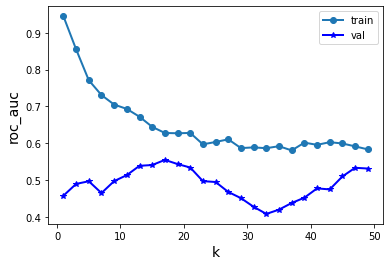

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.554
Valor correspondiente para el hiperparámetro: {'n_neighbors': 17}
0.5384615384615384
Sensibilidad y Accuracy 0.4 0.5384615384615384


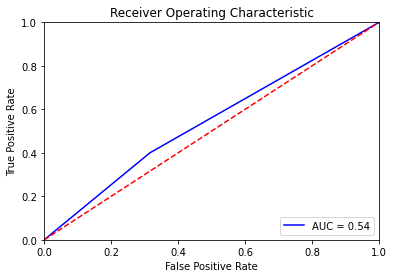

(155, 56) (155,) (39, 56) (39,)


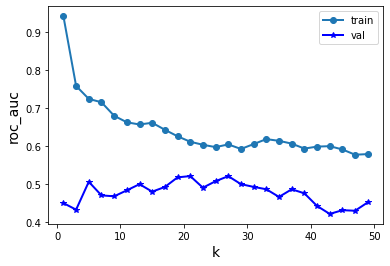

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.521
Valor correspondiente para el hiperparámetro: {'n_neighbors': 21}
0.41025641025641024
Sensibilidad y Accuracy 0.35 0.41025641025641024


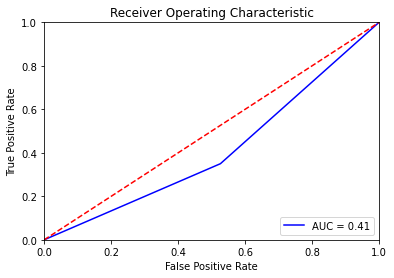

(155, 56) (155,) (39, 56) (39,)


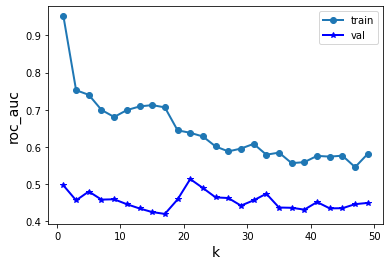

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.513
Valor correspondiente para el hiperparámetro: {'n_neighbors': 21}
0.5384615384615384
Sensibilidad y Accuracy 0.75 0.5384615384615384


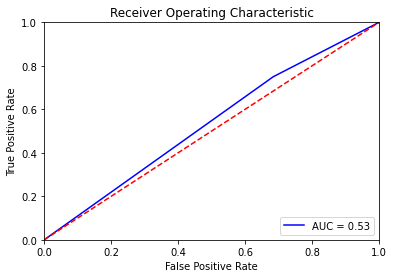

(155, 56) (155,) (39, 56) (39,)


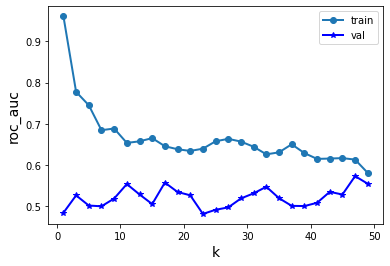

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.573
Valor correspondiente para el hiperparámetro: {'n_neighbors': 47}
0.46153846153846156
Sensibilidad y Accuracy 0.9 0.46153846153846156


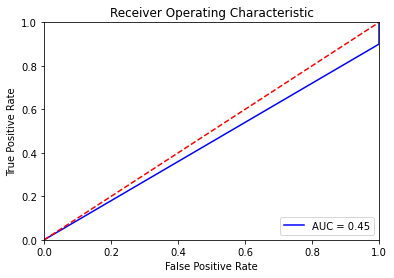

(155, 56) (155,) (39, 56) (39,)


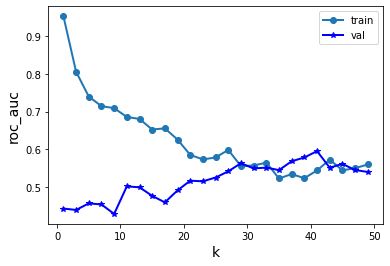

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.595
Valor correspondiente para el hiperparámetro: {'n_neighbors': 41}
0.5384615384615384
Sensibilidad y Accuracy 0.75 0.5384615384615384


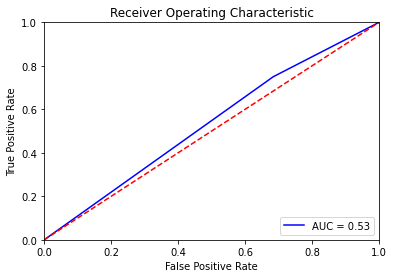

In [37]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
especificidad = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)


    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = knn(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    especificidad.append(b[3])
    

In [38]:
import statistics
media_knn = statistics.mean(accuracy) # 7
desviacion_estandar_knn = statistics.stdev(accuracy) # 5.164...

print(media_knn, desviacion_estandar_knn)
model.append("KNN")
mean.append(media_knn)
std.append(desviacion_estandar_knn)
media_knn2 = statistics.mean(roc) # 7
desviacion_estandar_knn2 = statistics.stdev(roc) # 5.164...


model2.append("KNN")
mean2.append(media_knn2)
std2.append(desviacion_estandar_knn2)


media_knn2 = statistics.mean(roc) # 7
desviacion_estandar_knn2 = statistics.stdev(roc) # 5.164...


model2.append("KNN")
mean2.append(media_knn2)
std2.append(desviacion_estandar_knn2)
print(media_knn2, desviacion_estandar_knn2)


media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)

media_knn4 = statistics.mean(especificidad) # 7
desviacion_estandar_knn4 = statistics.stdev(especificidad) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.49743589743589745 0.05903007401651967
0.4939473684210527 0.05921491211827064
0.63 0.2413503677229434
0.35789473684210527 0.25076061578045467


# SVC

In [39]:
from sklearn import svm
from sklearn.svm import SVC
def svc (X_train,X_test,Y_train,Y_test, seed):

  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
    svc=SVC(decision_function_shape='ovo', random_state=seed)
    parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],

                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

    svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)
    svc.fit(X_train, Y_train) #Entrenamos
  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
    roc_svc_val = np.array(svc.cv_results_['mean_test_score'])
  # Mostramos el mejor valor del parámetro y el score
    print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))
  # 2. Consulta de los valores de los hiper-parámetros 
    svc.get_params()
  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    svc_classif = svc.best_estimator_
    modelo_svc = svc_classif.fit(X_train, Y_train)
    y_output_svc = modelo_svc.predict(X_test)

    print(accuracy_score(Y_test, y_output_svc))

    print(confusion_matrix(Y_test, y_output_svc))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
    Especificidad = tn / (tn + fp)

    Sensibilidad= recall_score(Y_test, y_output_svc)

    Accuracy = accuracy_score(Y_test, y_output_svc)
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)

    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return (Sensibilidad, Accuracy, roc_auc, Especificidad )

(155, 56) (155,) (39, 56) (39,)
Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.5128205128205128
[[ 0 19]
 [ 0 20]]
Sensibilidad y Accuracy 1.0 0.5128205128205128


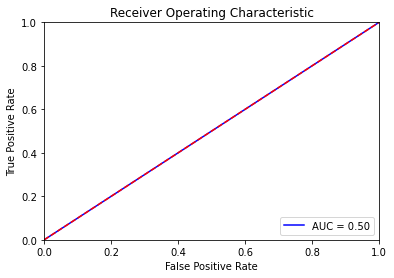

(155, 56) (155,) (39, 56) (39,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.574
0.5128205128205128
[[ 0 19]
 [ 0 20]]
Sensibilidad y Accuracy 1.0 0.5128205128205128


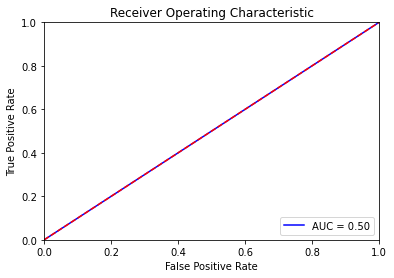

(155, 56) (155,) (39, 56) (39,)
Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.513
0.46153846153846156
[[16  3]
 [18  2]]
Sensibilidad y Accuracy 0.1 0.46153846153846156


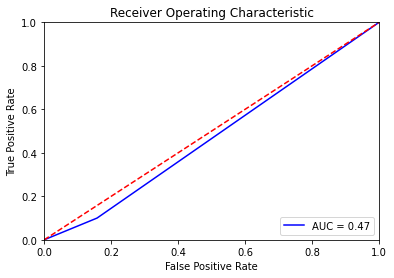

(155, 56) (155,) (39, 56) (39,)
Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.596
0.4358974358974359
[[15  4]
 [18  2]]
Sensibilidad y Accuracy 0.1 0.4358974358974359


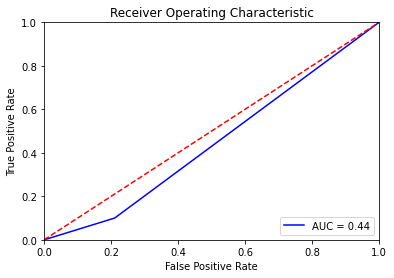

(155, 56) (155,) (39, 56) (39,)
Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.463
0.5128205128205128
[[ 0 19]
 [ 0 20]]
Sensibilidad y Accuracy 1.0 0.5128205128205128


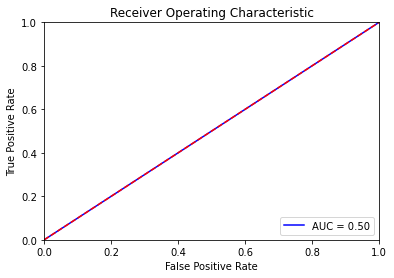

[1.0, 1.0, 0.1, 0.1, 1.0] [0.5128205128205128, 0.5128205128205128, 0.46153846153846156, 0.4358974358974359, 0.5128205128205128] [0.5, 0.5, 0.4710526315789474, 0.44473684210526315, 0.5]


In [40]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
especificidad = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = svc(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    especificidad.append(b[3])



print(sensi, accuracy, roc)

In [41]:
import statistics
media_svc = statistics.mean(accuracy) # 7
desviacion_svc = statistics.stdev(accuracy) # 5.164...


model.append("SVM")
mean.append(media_svc)
std.append(desviacion_svc)
print(media_svc, desviacion_svc)


media_svc2 = statistics.mean(roc) # 7
desviacion_estandar_svc2 = statistics.stdev(roc) # 5.164...
print(media_svc2, desviacion_estandar_svc2 )


model2.append("SVM")
mean2.append(media_svc2)
std2.append(desviacion_estandar_svc2)

media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)

media_knn4 = statistics.mean(especificidad) # 7
desviacion_estandar_knn4 = statistics.stdev(especificidad) # 5.164...

print(media_knn4, desviacion_estandar_knn4)

0.48717948717948717 0.036261886214694714
0.4831578947368421 0.024868072957742002
0.64 0.4929503017546495
0.3263157894736842 0.4472135954999579


# DecisionTree

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

def decisionTree(X_std_all_train, X_std_all_test, Y_train, Y_test,seed):
    
    #std_all = preprocessing.StandardScaler().fit(X_train) #Extraemos las características y hacemos la estadndarización
    #X_std_all_train = std_all.transform(X_train) #tiene las 8 características estandarizadas
    #X_std_all_test = std_all.transform(X_test)
    # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
    param_grid = {'max_depth': range(1,9)}
    profundidad_grid = np.array(range(1,9))

    print(X_std_all_train)
  #  X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)

    grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=seed), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
    grid_arbol_clasif.fit(X_std_all_train, Y_train)
    print(grid_arbol_clasif.best_params_)

    perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
    perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

    plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
    plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
    plt.xlabel('Profundidad',fontsize=14)
    plt.ylabel('ROC-AUC',fontsize=14)
    plt.legend()
    plt.show()

    print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
    print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

    
    # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
    print(grid_arbol_clasif.get_params())


    # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    Arbol_clasif_all = grid_arbol_clasif.best_estimator_
    modelo_arbol_clasif = Arbol_clasif_all.fit(X_std_all_train, Y_train)

    y_output_arbol = modelo_arbol_clasif.predict(X_std_all_test)
    print(accuracy_score(Y_test, y_output_arbol))
    print(confusion_matrix(Y_test, y_output_arbol))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_arbol).ravel()
    Especificidad = tn / (tn + fp)

    Sensibilidad= recall_score(Y_test, y_output_arbol)
    Accuracy = accuracy_score(Y_test, y_output_arbol)
    
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)
    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return (Sensibilidad, Accuracy, roc_auc, Especificidad)



(155, 56) (155,) (39, 56) (39,)
     Hypertension  Hyperlipidemia  Hypothyroidism  Depression  \
55              0               0               1           0   
26              0               0               0           0   
79              0               0               0           0   
128             1               1               0           0   
66              0               0               0           0   
..            ...             ...             ...         ...   
126             1               1               0           0   
10              0               0               0           0   
54              0               0               0           0   
153             1               0               0           1   
131             1               0               1           0   

     Coronary artery disease  Diabetic peripheral neuropathy  Dyslipidemia  \
55                         1                               0             0   
26                         0   

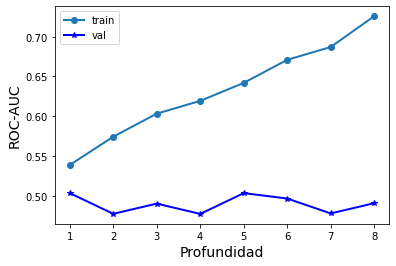

Mejor ROC-AUC en validación cruzada: 0.503
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 0, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=0), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.4358974358974359
[[17  2]
 [20  0]]
Sensibilidad y Accuracy 0.0 0.4358974358974359


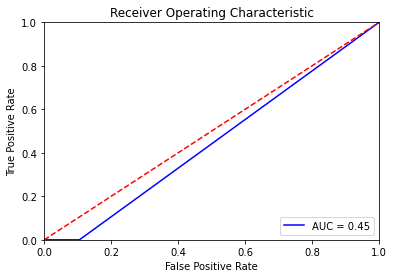

(155, 56) (155,) (39, 56) (39,)
     Hypertension  Hyperlipidemia  Hypothyroidism  Depression  \
108             1               0               0           0   
6               0               0               0           0   
94              0               1               0           0   
80              1               0               0           0   
111             0               0               0           0   
..            ...             ...             ...         ...   
61              1               1               0           0   
109             1               0               0           0   
69              0               1               0           0   
186             1               1               0           0   
115             0               1               1           0   

     Coronary artery disease  Diabetic peripheral neuropathy  Dyslipidemia  \
108                        1                               0             1   
6                          0   

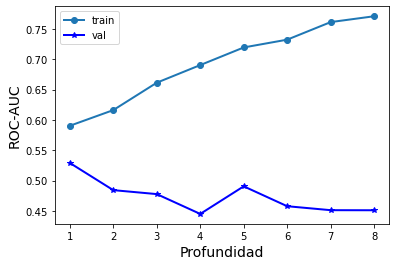

Mejor ROC-AUC en validación cruzada: 0.529
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=1), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.46153846153846156
[[16  3]
 [18  2]]
Sensibilidad y Accuracy 0.1 0.46153846153846156


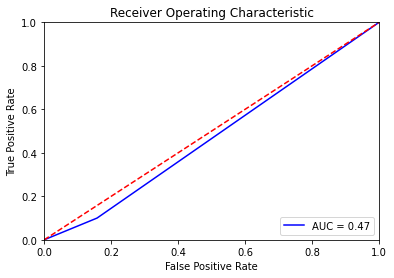

(155, 56) (155,) (39, 56) (39,)
     Hypertension  Hyperlipidemia  Hypothyroidism  Depression  \
118             1               1               0           0   
109             1               0               0           0   
46              1               0               1           0   
18              0               0               1           0   
182             0               1               1           1   
..            ...             ...             ...         ...   
61              1               1               0           0   
160             1               0               0           0   
145             1               1               0           0   
103             0               0               0           0   
38              1               0               0           0   

     Coronary artery disease  Diabetic peripheral neuropathy  Dyslipidemia  \
118                        0                               0             0   
109                        0   

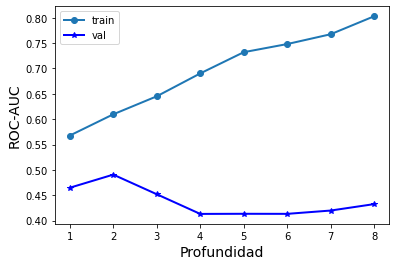

Mejor ROC-AUC en validación cruzada: 0.491
Mejor valor del hiperparámetro: {'max_depth': 2}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 2, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=2), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.48717948717948717
[[ 0 19]
 [ 1 19]]
Sensibilidad y Accuracy 0.95 0.48717948717948717


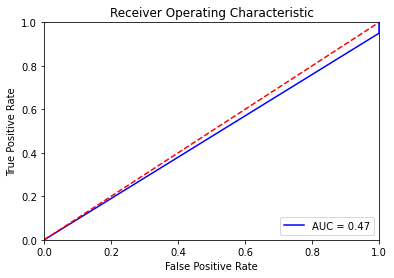

(155, 56) (155,) (39, 56) (39,)
     Hypertension  Hyperlipidemia  Hypothyroidism  Depression  \
149             0               0               0           0   
138             1               1               0           1   
114             1               0               1           1   
175             0               1               0           0   
174             0               1               0           0   
..            ...             ...             ...         ...   
107             1               0               0           0   
108             1               0               0           0   
162             0               0               0           0   
102             1               1               1           1   
165             0               0               1           0   

     Coronary artery disease  Diabetic peripheral neuropathy  Dyslipidemia  \
149                        0                               0             0   
138                        0   

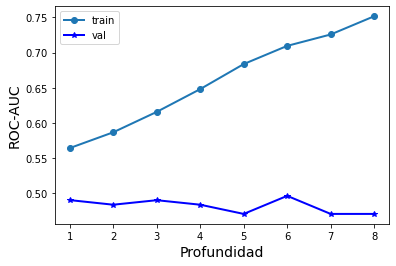

Mejor ROC-AUC en validación cruzada: 0.497
Mejor valor del hiperparámetro: {'max_depth': 6}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 3, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=3), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5128205128205128
[[ 8 11]
 [ 8 12]]
Sensibilidad y Accuracy 0.6 0.5128205128205128


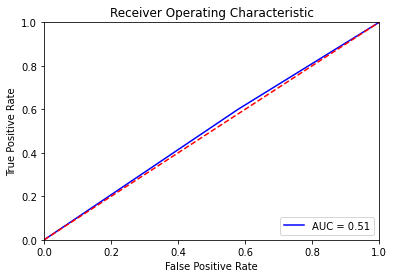

(155, 56) (155,) (39, 56) (39,)
     Hypertension  Hyperlipidemia  Hypothyroidism  Depression  \
71              1               0               0           0   
11              1               0               0           1   
178             1               1               0           0   
124             1               1               0           0   
102             1               1               1           1   
..            ...             ...             ...         ...   
94              0               1               0           0   
137             1               1               1           0   
53              1               1               0           0   
20              0               0               1           0   
138             1               1               0           1   

     Coronary artery disease  Diabetic peripheral neuropathy  Dyslipidemia  \
71                         0                               0             0   
11                         0   

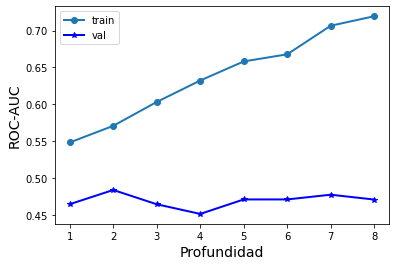

Mejor ROC-AUC en validación cruzada: 0.484
Mejor valor del hiperparámetro: {'max_depth': 2}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 4, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=4), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5384615384615384
[[ 1 18]
 [ 0 20]]
Sensibilidad y Accuracy 1.0 0.5384615384615384


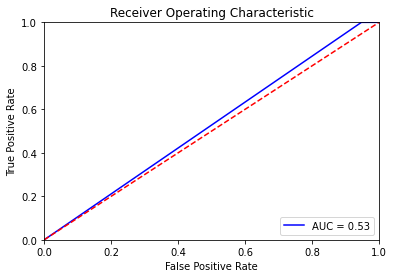

[0.0, 0.1, 0.95, 0.6, 1.0] [0.4358974358974359, 0.46153846153846156, 0.48717948717948717, 0.5128205128205128, 0.5384615384615384] [0.4473684210526316, 0.4710526315789474, 0.475, 0.5105263157894737, 0.5263157894736843]


In [43]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
especificidad = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = decisionTree(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    especificidad.append(b[3])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(sensi, accuracy, roc)


In [44]:
import statistics
media_sen_logarit = statistics.mean(accuracy) # 7
desviacion_estandar_sen_logarit = statistics.stdev(accuracy) # 5.164...

print(media_sen_logarit, desviacion_estandar_sen_logarit)
model.append("DT")
mean.append(media_sen_logarit)
std.append(desviacion_estandar_sen_logarit)


media_log = statistics.mean(roc) # 7
desviacion_estandar_log = statistics.stdev(roc) # 5.164...
print(media_log, desviacion_estandar_log)

model2.append("DT")
mean2.append(media_log)
std2.append(desviacion_estandar_log)


media_des3 = statistics.mean(sensi) # 7
desviacion_des_knn3 = statistics.stdev(sensi) # 5.164...

print(media_des3, desviacion_des_knn3)

media_knn4 = statistics.mean(especificidad) # 7
desviacion_estandar_knn4 = statistics.stdev(especificidad) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.48717948717948717 0.04054202128420997
0.4860526315789474 0.031873625112925845
0.53 0.4658325879540846
0.4421052631578947 0.42203831993114643


# Regresión Logística

# Regresión Logística Lasso

In [45]:
def reg_Lasso(X_train_norm, X_test_norm, Y_train, Y_test):
              

    #scaler = StandardScaler() #normalizamos
    #scalerfit =  scaler.fit(X_train) #fit con los datos de train
    #X_train_norm=scaler.transform(X_train) #balancear el train, normalizar en los métodos que hay relación entre variables y normalizamos tanto el conjunto de entrenamiento como el de test.
    #X_test_norm=scaler.transform(X_test)
    # NORMALIZANDO 
              
    from sklearn.linear_model import Lasso

    lasso = Lasso()

    logreg=LogisticRegression(solver='liblinear', penalty='l1')
    # Valores de alpha
    parameters = {"C":[1e-4, 1e-2, 1, 5, 10, 20]}

    # Grid search para lasso regression
    lasso_regression = GridSearchCV(logreg, parameters, scoring='accuracy', cv=5)

    # Entrenamos
    lasso_train=lasso_regression.fit(X_train_norm, Y_train)

    print(lasso_regression.best_params_)
    print(lasso_regression.best_score_)

    # Obtenemos la salida predicha
    y_pred_lasso = lasso_regression.predict(X_test_norm)
#  Calculamos la matriz de confusión
    cm = confusion_matrix(Y_test, y_pred_lasso)
    print(cm)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lasso).ravel()
    print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')
    Especificidad = tn / (tn + fp)

    # Calcumos accuracy_score
    Accuracy=accuracy_score(Y_test, y_pred_lasso)
    print(f'Accuracy: {Accuracy}')

    target_names = ['Non-diabetic', 'Diabetic']
    print(classification_report(Y_test, y_pred_lasso, target_names=target_names))

    #Sensibilidad
    Sensibilidad=recall_score(Y_test, y_pred_lasso)
    print(f'Sensibilidad: {Sensibilidad}')
    #accuracy.append(Accuracy)
    #sensibilidad.append(Sensibilidad)
    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_lasso)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC curve
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #roc.append(roc_auc)

    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

(155, 56) (155,) (39, 56) (39,)
{'C': 5}
0.5161290322580645
[[ 8 11]
 [ 9 11]]
tn: 8, fp:11, fn:9, tp:11
Accuracy: 0.48717948717948717
              precision    recall  f1-score   support

Non-diabetic       0.47      0.42      0.44        19
    Diabetic       0.50      0.55      0.52        20

    accuracy                           0.49        39
   macro avg       0.49      0.49      0.48        39
weighted avg       0.49      0.49      0.49        39

Sensibilidad: 0.55


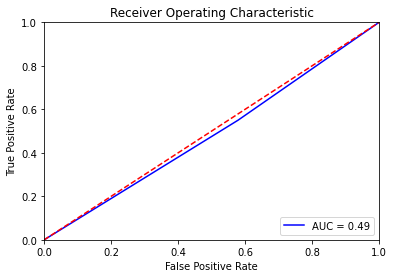

(155, 56) (155,) (39, 56) (39,)
{'C': 0.0001}
0.4967741935483871
[[19  0]
 [20  0]]
tn: 19, fp:0, fn:20, tp:0
Accuracy: 0.48717948717948717


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        19
    Diabetic       0.00      0.00      0.00        20

    accuracy                           0.49        39
   macro avg       0.24      0.50      0.33        39
weighted avg       0.24      0.49      0.32        39

Sensibilidad: 0.0


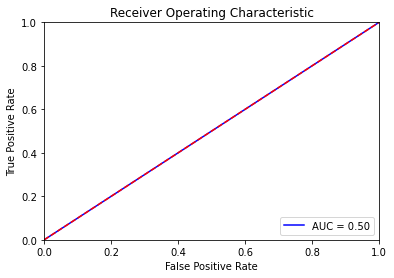

(155, 56) (155,) (39, 56) (39,)
{'C': 1}
0.5096774193548387
[[ 8 11]
 [ 8 12]]
tn: 8, fp:11, fn:8, tp:12
Accuracy: 0.5128205128205128
              precision    recall  f1-score   support

Non-diabetic       0.50      0.42      0.46        19
    Diabetic       0.52      0.60      0.56        20

    accuracy                           0.51        39
   macro avg       0.51      0.51      0.51        39
weighted avg       0.51      0.51      0.51        39

Sensibilidad: 0.6


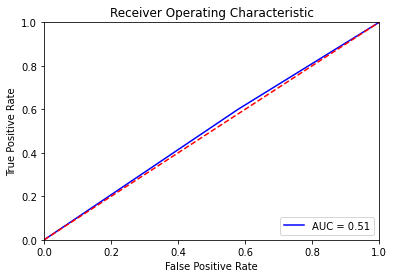

(155, 56) (155,) (39, 56) (39,)
{'C': 1}
0.5161290322580645
[[ 5 14]
 [11  9]]
tn: 5, fp:14, fn:11, tp:9
Accuracy: 0.358974358974359
              precision    recall  f1-score   support

Non-diabetic       0.31      0.26      0.29        19
    Diabetic       0.39      0.45      0.42        20

    accuracy                           0.36        39
   macro avg       0.35      0.36      0.35        39
weighted avg       0.35      0.36      0.35        39

Sensibilidad: 0.45


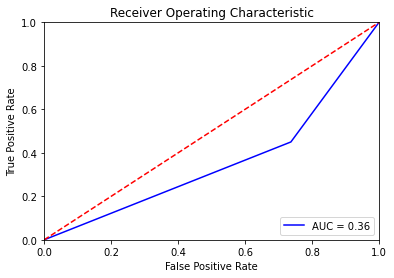

(155, 56) (155,) (39, 56) (39,)
{'C': 0.0001}
0.4967741935483871
[[19  0]
 [20  0]]
tn: 19, fp:0, fn:20, tp:0
Accuracy: 0.48717948717948717
              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        19
    Diabetic       0.00      0.00      0.00        20

    accuracy                           0.49        39
   macro avg       0.24      0.50      0.33        39
weighted avg       0.24      0.49      0.32        39

Sensibilidad: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


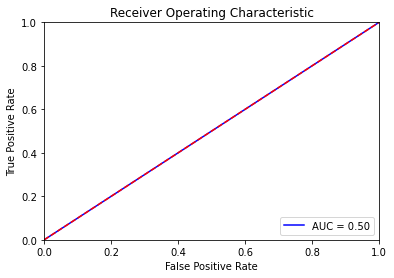

[0.55, 0.0, 0.6, 0.45, 0.0] [0.48717948717948717, 0.48717948717948717, 0.5128205128205128, 0.358974358974359, 0.48717948717948717] [0.4855263157894737, 0.5, 0.5105263157894737, 0.35657894736842105, 0.5]


In [46]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
especificidad = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = reg_Lasso(X_train, X_test, Y_train, Y_test)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    especificidad.append(b[3])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(sensi, accuracy, roc)

In [47]:
media_lasso = statistics.mean(accuracy) # 7
desviacion_estandar_lasso = statistics.stdev(accuracy) # 5.164...


model.append("LASSO")
mean.append(media_lasso)
std.append(desviacion_estandar_lasso)
print(media_lasso, desviacion_estandar_lasso)

media_lasso2 = statistics.mean(roc) # 7
desviacion_estandar_lasso2 = statistics.stdev(roc) # 5.164...
print(media_lasso2, desviacion_estandar_lasso2)

model2.append("LASSO")
mean2.append(media_lasso2)
std2.append(desviacion_estandar_lasso2)


media_lasso3 = statistics.mean(sensi) # 7
desviacion_estandar_lasso3 = statistics.stdev(sensi) # 5.164...
print(media_lasso3, desviacion_estandar_lasso3)

media_knn4 = statistics.mean(especificidad) # 7
desviacion_estandar_knn4 = statistics.stdev(especificidad) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.4666666666666667 0.06121710967340164
0.4705263157894737 0.06431640321871
0.32 0.297069015550259
0.6210526315789473 0.3518845189567743


In [48]:
def plot_mean_std_metric(df_metrics, lims, metric_name='', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [49]:
df_metrics = pd.DataFrame()


df_metrics["model"] = model
df_metrics["mean"] = mean
df_metrics["std"] = std

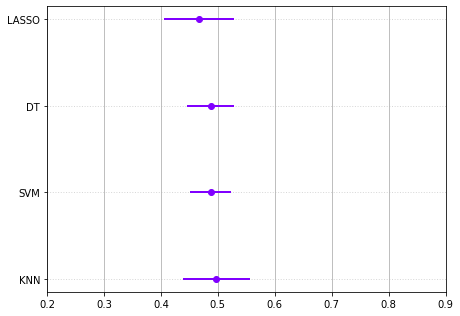

In [50]:
plot_mean_std_metric(df_metrics, lims=(0.2, 0.9), title_figure='', flag_save_figure=True)


In [51]:
df_metrics2 = pd.DataFrame()


df_metrics2["model"] = model2
df_metrics2["mean"] = mean2
df_metrics2["std"] = std2

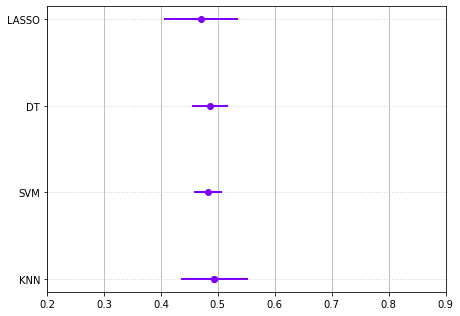

In [52]:
plot_mean_std_metric(df_metrics2, lims=(0.2, 0.9), title_figure='',flag_save_figure=True)


# Selección de Características
# Feature Selection ExtraTreesClassifier

In [53]:
from sklearn.ensemble import ExtraTreesClassifier

def extraTree(X_train, X_test, Y_train, Y_test):
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    # Como en árboles, no es necesario que las características estén normalizadas
    # Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

    forest.fit(X_train, Y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Muestra el ranking en el ordenamiento
    print("Ranking de Características:")

    for f in range(X_train.shape[1]):
        print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure()
    plt.title("Importancia de las características")
    plt.bar(range(X_train.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
    return indices[0:5]

(155, 56) (155,) (39, 56) (39,)
Ranking de Características:
1. Característica 0 (0.053404)
2. Característica 2 (0.040077)
3. Característica 4 (0.039019)
4. Característica 5 (0.034393)
5. Característica 1 (0.034288)
6. Característica 9 (0.033314)
7. Característica 7 (0.032760)
8. Característica 11 (0.031997)
9. Característica 12 (0.031345)
10. Característica 3 (0.031344)
11. Característica 8 (0.031205)
12. Característica 6 (0.030686)
13. Característica 15 (0.030673)
14. Característica 45 (0.027438)
15. Característica 14 (0.026519)
16. Característica 18 (0.024664)
17. Característica 16 (0.024316)
18. Característica 10 (0.023313)
19. Característica 29 (0.022540)
20. Característica 22 (0.020813)
21. Característica 41 (0.020719)
22. Característica 24 (0.017104)
23. Característica 32 (0.016700)
24. Característica 13 (0.016257)
25. Característica 44 (0.016114)
26. Característica 17 (0.015808)
27. Característica 38 (0.015402)
28. Característica 33 (0.014143)
29. Característica 25 (0.013893)
30

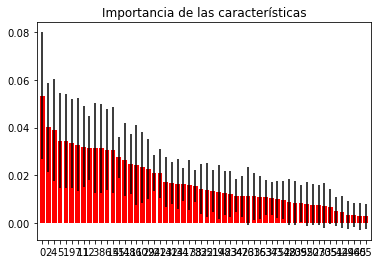

(155, 56) (155,) (39, 56) (39,)
Ranking de Características:
1. Característica 0 (0.056908)
2. Característica 4 (0.051656)
3. Característica 12 (0.043001)
4. Característica 1 (0.034725)
5. Característica 3 (0.034572)
6. Característica 5 (0.034224)
7. Característica 11 (0.033914)
8. Característica 8 (0.032940)
9. Característica 2 (0.031807)
10. Característica 15 (0.029601)
11. Característica 9 (0.029386)
12. Característica 18 (0.027979)
13. Característica 6 (0.026767)
14. Característica 10 (0.026158)
15. Característica 7 (0.026135)
16. Característica 14 (0.025354)
17. Característica 45 (0.023914)
18. Característica 16 (0.023839)
19. Característica 13 (0.018625)
20. Característica 38 (0.017885)
21. Característica 41 (0.017533)
22. Característica 20 (0.016474)
23. Característica 21 (0.016472)
24. Característica 17 (0.015986)
25. Característica 34 (0.015740)
26. Característica 36 (0.015071)
27. Característica 25 (0.014957)
28. Característica 19 (0.014677)
29. Característica 33 (0.014442)
30

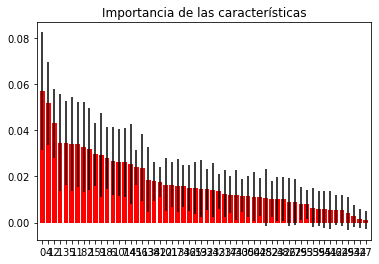

(155, 56) (155,) (39, 56) (39,)
Ranking de Características:
1. Característica 0 (0.045976)
2. Característica 4 (0.042293)
3. Característica 2 (0.041275)
4. Característica 14 (0.038053)
5. Característica 12 (0.037249)
6. Característica 6 (0.036215)
7. Característica 7 (0.035424)
8. Característica 8 (0.035140)
9. Característica 1 (0.034483)
10. Característica 11 (0.032490)
11. Característica 3 (0.032337)
12. Característica 18 (0.030462)
13. Característica 45 (0.029416)
14. Característica 5 (0.028223)
15. Característica 9 (0.026198)
16. Característica 21 (0.025471)
17. Característica 22 (0.025253)
18. Característica 10 (0.023099)
19. Característica 15 (0.022894)
20. Característica 16 (0.020418)
21. Característica 44 (0.017680)
22. Característica 52 (0.015835)
23. Característica 38 (0.015679)
24. Característica 13 (0.015208)
25. Característica 30 (0.014562)
26. Característica 23 (0.014541)
27. Característica 25 (0.014379)
28. Característica 17 (0.014158)
29. Característica 37 (0.013823)
30

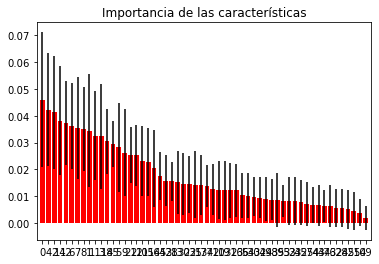

(155, 56) (155,) (39, 56) (39,)
Ranking de Características:
1. Característica 0 (0.052713)
2. Característica 2 (0.045834)
3. Característica 4 (0.041568)
4. Característica 22 (0.036545)
5. Característica 6 (0.036274)
6. Característica 12 (0.035925)
7. Característica 8 (0.034703)
8. Característica 3 (0.034254)
9. Característica 18 (0.032213)
10. Característica 1 (0.032121)
11. Característica 9 (0.031921)
12. Característica 10 (0.030031)
13. Característica 14 (0.027807)
14. Característica 15 (0.026204)
15. Característica 7 (0.025166)
16. Característica 45 (0.023867)
17. Característica 5 (0.023488)
18. Característica 41 (0.021487)
19. Característica 16 (0.020693)
20. Característica 24 (0.019238)
21. Característica 44 (0.017179)
22. Característica 25 (0.016863)
23. Característica 32 (0.016741)
24. Característica 11 (0.016584)
25. Característica 26 (0.016158)
26. Característica 23 (0.015680)
27. Característica 30 (0.015091)
28. Característica 17 (0.014471)
29. Característica 19 (0.014165)
30

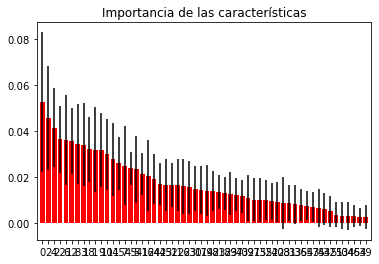

(155, 56) (155,) (39, 56) (39,)
Ranking de Características:
1. Característica 0 (0.056664)
2. Característica 6 (0.043509)
3. Característica 1 (0.038854)
4. Característica 4 (0.036720)
5. Característica 2 (0.036352)
6. Característica 18 (0.035545)
7. Característica 10 (0.034500)
8. Característica 11 (0.034258)
9. Característica 9 (0.031483)
10. Característica 14 (0.030079)
11. Característica 5 (0.029556)
12. Característica 12 (0.028506)
13. Característica 7 (0.028347)
14. Característica 3 (0.028006)
15. Característica 15 (0.025675)
16. Característica 22 (0.024567)
17. Característica 41 (0.023665)
18. Característica 8 (0.021418)
19. Característica 13 (0.021310)
20. Característica 21 (0.020939)
21. Característica 29 (0.019228)
22. Característica 45 (0.018052)
23. Característica 17 (0.017280)
24. Característica 44 (0.016877)
25. Característica 16 (0.016793)
26. Característica 25 (0.016579)
27. Característica 20 (0.016426)
28. Característica 32 (0.016352)
29. Característica 28 (0.014454)
30

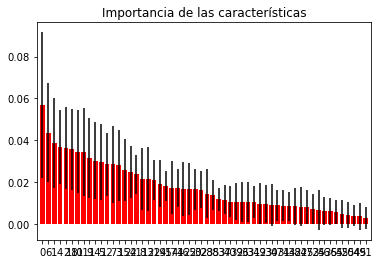

[array([0, 2, 4, 5, 1], dtype=int64), array([ 0,  4, 12,  1,  3], dtype=int64), array([ 0,  4,  2, 14, 12], dtype=int64), array([ 0,  2,  4, 22,  6], dtype=int64), array([0, 6, 1, 4, 2], dtype=int64)]


In [54]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = extraTree(X_train, X_test, Y_train, Y_test)
    indices_extr .append(b)
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

#  Selección de características con el estadístico chi-cuadrado

In [55]:
# Importamos las bibliotecas necesarias 
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
# Scikit-learn proporciona la clase SelectKBest, que al usarse en combinación con distintos tests estadísticos, permite seleccionar una serie de características

def chisquare(X_train, X_test, Y_train, Y_test, data_input_new):
    # como tenemos 9 características, evaluamos el estadístico chi2 para las 9, y posteriormente ordenamos los valores
    bestfeatures = SelectKBest(score_func=mutual_info_classif, k=9)
    fit = bestfeatures.fit(data_input_new, data_output)
    print(fit.scores_)

    names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',"f12" 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27',  'f28', 'f29', 'f30', 'f31',"f32" 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f40', 'f51', 'f52', "f53", "f54", "f55", "f56", "f57"]
    data_input_new2 = pd.DataFrame(data_input_new, columns = names)

    for element,name in zip(data_input_new.columns, names):
        print(name,element)

    array = data_input_new.values
    data_input_array = array [:,0:57]
    print(data_input_array.shape)

    pd_extendido = pd.DataFrame(data_input_array, columns=names)

    df = pd.DataFrame({'Nombre_feat':pd_extendido.columns[0:20], 'valores':fit.scores_[0:20]})
    df_ordenado = df.sort_values('valores', ascending=False)
    ax = df_ordenado.plot.bar(x='Nombre_feat', y='valores', rot=0)
    plt.title("Ordenamiento de características con el estadístico chi cuadrado y las características originales")


In [56]:
data_input.shape

(194, 56)

(155, 56) (155,) (39, 56) (39,)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.11787341e-02 0.00000000e+00
 4.80449265e-05 3.09248386e-02 1.08938715e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.40876639e-03 0.00000000e+00
 0.00000000e+00 6.56362270e-03 8.81985731e-03 0.00000000e+00
 0.00000000e+00 1.93422959e-02 0.00000000e+00 1.99154749e-02
 0.00000000e+00 0.00000000e+00 5.93552800e-03 0.00000000e+00
 8.48932899e-02 3.70622192e-02 5.31996373e-03 5.20713509e-02
 0.00000000e+00 0.00000000e+00 5.90435004e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.01571719e-03 7.99191761e-02 0.00000000e+00 5.46065923e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.93432787e-02 3.58047066e-02 0.00000000e+00 5.90281971e-02
 3.44987889e-02 0.00000000e+00 1.61104833e-04 0.00000000e+00]
f0 Hypertension
f1 Hyperlipidemia
f2 Hypothyroidism
f3 Depression
f4 Coronary artery disease
f5 Diabetic peripher

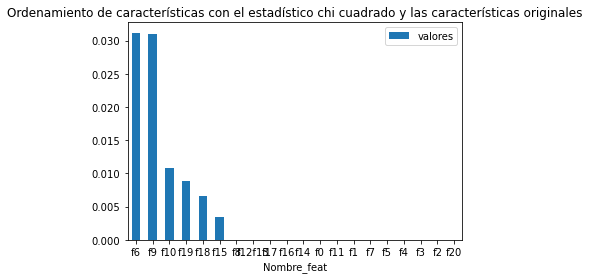

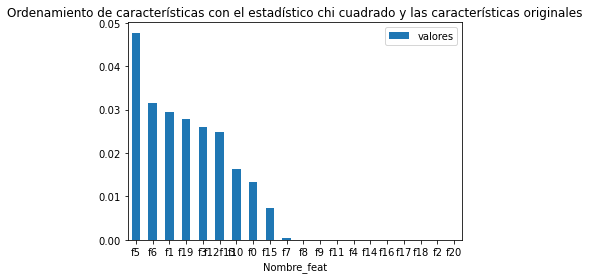

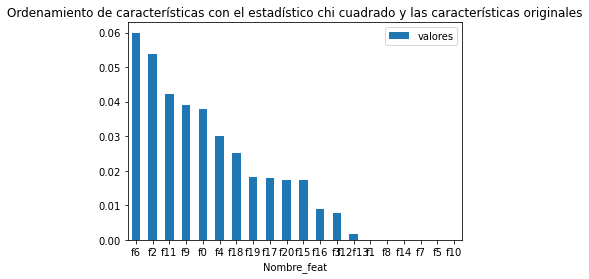

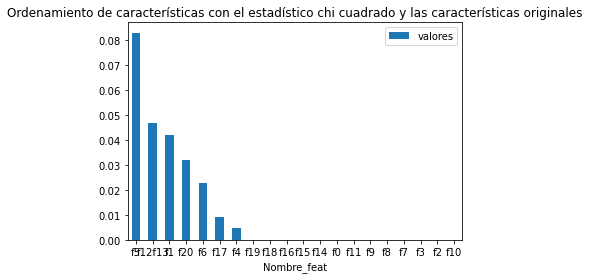

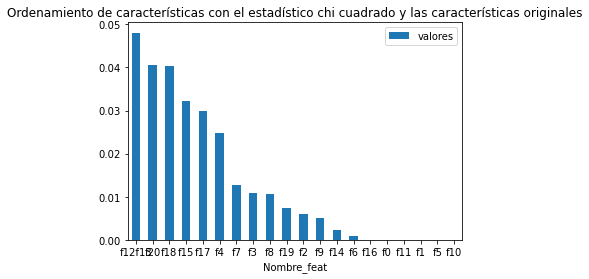

In [57]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = chisquare(X_train, X_test, Y_train, Y_test, data_input)
    indices_extr .append(b)
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

## Selección de características. Métodos embedded

In [58]:
from matplotlib import pyplot
def embedded(X_train, X_test, Y_train, Y_test, data_input_new):
    # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
    param_grid = {'max_depth': range(1,6)}
    profundidad_grid = np.array(range(1,6))


    grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = 'roc_auc', cv=3, return_train_score=True)
    grid_arbol_clasif.fit(X_train, Y_train)
    print(grid_arbol_clasif.best_params_)

    perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
    perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

    plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
    plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
    plt.xlabel('Profundidad',fontsize=14)
    plt.ylabel('ROC-AUC',fontsize=14)
    plt.legend()
    plt.show()

    print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
    print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

    # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
    grid_arbol_clasif.get_params()

    # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    Arbol_clasif_all = grid_arbol_clasif.best_estimator_
    modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)
    importance_arbol = modelo_arbol_clasif.feature_importances_
    pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
    pyplot.show()

    # 5. Se representa gráficamente el modelo de clasificación
    from sklearn.tree import export_graphviz
    #from sklearn.externals.six import StringIO  
    from six import StringIO
    from IPython.display import Image  
    import pydotplus

    dot_data = StringIO()
    export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = data_input_new.columns[0:],class_names=['y-diab','n-diab'])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('Tree_Clasif_all.png')
    Image(graph.create_png())

(155, 56) (155,) (39, 56) (39,)
{'max_depth': 1}


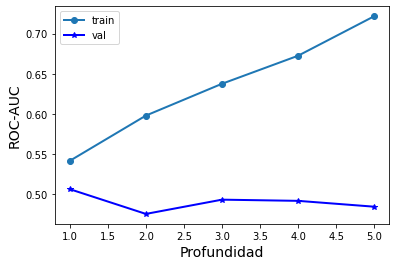

Mejor ROC-AUC en validación cruzada: 0.506
Mejor valor del hiperparámetro: {'max_depth': 1}


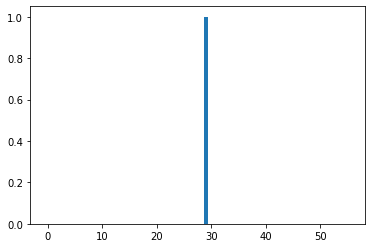

(155, 56) (155,) (39, 56) (39,)
{'max_depth': 1}


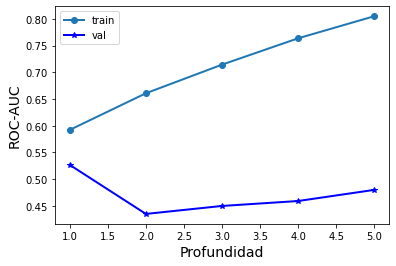

Mejor ROC-AUC en validación cruzada: 0.527
Mejor valor del hiperparámetro: {'max_depth': 1}


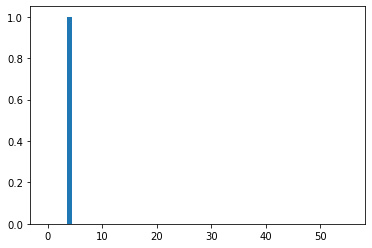

(155, 56) (155,) (39, 56) (39,)
{'max_depth': 2}


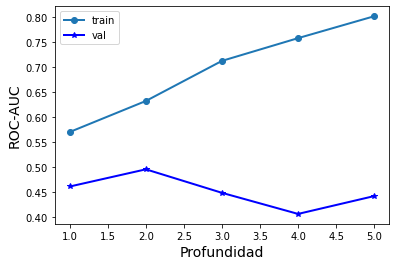

Mejor ROC-AUC en validación cruzada: 0.496
Mejor valor del hiperparámetro: {'max_depth': 2}


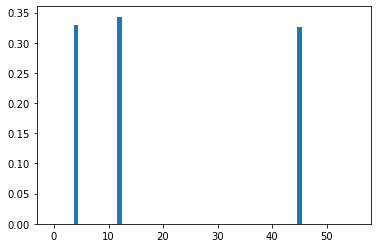

(155, 56) (155,) (39, 56) (39,)
{'max_depth': 1}


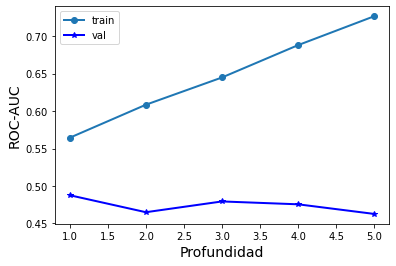

Mejor ROC-AUC en validación cruzada: 0.488
Mejor valor del hiperparámetro: {'max_depth': 1}


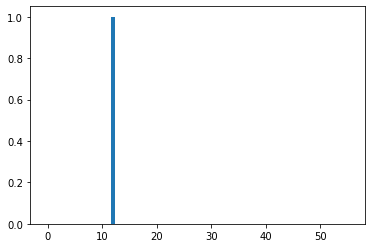

(155, 56) (155,) (39, 56) (39,)
{'max_depth': 2}


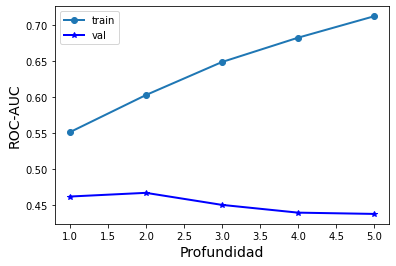

Mejor ROC-AUC en validación cruzada: 0.467
Mejor valor del hiperparámetro: {'max_depth': 2}


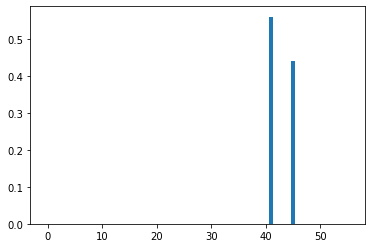

[None, None, None, None, None]


In [59]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = embedded(X_train, X_test, Y_train, Y_test, data_input)
    indices_extr .append(b)
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

# Boostrap

In [60]:
def compute_boostrap(df_data, v_column_names, label_name, generic_name, percentage_resampling=0.8, repetitions=30, flag_save_importance=False):

    list_variable_importance = []

    for i in range(len(v_column_names)):
        list_variable_importance.append(bootstrap_ci(df_data, v_column_names[i], (1 / percentage_resampling),
                                                     label_name, repetitions=repetitions))

    m_variable_importance = np.array(list_variable_importance)
    m_variable_importance = m_variable_importance.reshape(m_variable_importance.shape[0], 2)

    m_var_importance_bootstrap = np.c_[v_column_names, m_variable_importance]
    df_var_importance_bootstrap = pd.DataFrame(m_var_importance_bootstrap, columns=['var_name', 'ci_lower', 'ci_upper'])

    if flag_save_importance:
        df_var_importance_bootstrap.to_csv('df_var_importance_boostrap_{}.csv'.format(generic_name))


def bootstrap_ci(df_data, variable, div, classes, repetitions=3000, alpha=0.05, random_state=np.arange(1, 30000, 10)):
    """
    Compute bootstrap method with confidence interval
    :param df_data: a dataframe that includes observations of the two sample (df models)
    :param variable: a column_name of the column that includes observations (sens, espec,acc,precision,auc)
    :param div:
    :param classes: a column_name of the column that includes classes (This column should contain two different group names: dt and lasso, dt and svm, svm and lasso)
    :param repetitions: the number of times you want the bootstrapping to repeat. Default is 1000.
    :param alpha: likelihood that the true population parameter lies outside the confidence interval. Default is 0.05.
    :param random_state: enable users to set their own random_state, default is None
    :return:
    """
    df = df_data[[variable, classes]]
    bootstrap_sample_size = len(df)

    proportion_diffs = []
    print("sample size: ", int(bootstrap_sample_size/div))

    for i in range(repetitions):

        bootstrap_sample = df.sample(n=int(bootstrap_sample_size/div), replace=False, random_state=random_state[i])

        print(bootstrap_sample)

        label_0 = (bootstrap_sample[(bootstrap_sample[classes] == 0)])
        mean_label_0 = label_0[variable].mean()
        label_1 = (bootstrap_sample[(bootstrap_sample[classes] == 1)])
        mean_label_1 = label_1[variable].mean()

        proportion_diff = mean_label_1 - mean_label_0
        proportion_diffs.append(proportion_diff)

        df_proportions = pd.DataFrame(proportion_diffs)

    out = []

    for tt in range(len(df_proportions.columns)):

        left = np.percentile(df_proportions[tt], alpha / 2 * 100)
        right = np.percentile(df_proportions[tt], 100 - alpha / 2 * 100)
        out.append([round(left, 2), round(right, 2)])

    return out

In [61]:
data_new2 = data_new2.rename(columns = {"BCaseControlStatus": "label"})

In [62]:
data_new2 = data_new2.replace("Case",1).replace("Control",0)
data_new2.shape

(194, 57)

In [63]:
data_input.head()

,Hypertension,Hyperlipidemia,Hypothyroidism,Depression,Coronary artery disease,Diabetic peripheral neuropathy,Dyslipidemia,Proliferative diabetic retinopathy,Chronic kidney disease,Osteoporosis,...,Coronary stent placement,Renal insufficiency,Rheumatoid arthritis,Spinal stenosis of unspecified region,Knee surgery NOS,Restless leg syndrome,Breast cancer,Ulcerative colitis,Celiac disease,Gastroparesis
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [64]:
compute_boostrap(data_new2, data_input.columns, 'label', 'importance_bootstrap', flag_save_importance=True)

sample size:  155
     Hypertension  label
44              1      0
172             1      1
163             1      1
35              1      1
136             1      1
..            ...    ...
3               0      0
164             1      1
49              1      1
149             0      0
131             1      1

[155 rows x 2 columns]
     Hypertension  label
88              1      1
108             1      0
111             0      1
22              1      0
66              0      0
..            ...    ...
7               1      1
142             1      1
44              1      0
27              1      0
138             1      0

[155 rows x 2 columns]
     Hypertension  label
21              1      0
9               0      1
75              1      1
40              1      1
187             1      0
..            ...    ...
30              0      1
76              0      1
132             1      0
118             1      1
69              0      1

[155 rows x 2 columns]
     Hyper

     Hypertension  label
188             1      0
54              0      1
189             1      1
101             1      0
25              0      0
..            ...    ...
149             0      0
78              1      0
30              0      1
67              1      0
103             0      0

[155 rows x 2 columns]
sample size:  155
     Hyperlipidemia  label
44                1      0
172               0      1
163               0      1
35                1      1
136               1      1
..              ...    ...
3                 0      0
164               0      1
49                0      1
149               0      0
131               0      1

[155 rows x 2 columns]
     Hyperlipidemia  label
88                0      1
108               0      0
111               0      1
22                0      0
66                0      0
..              ...    ...
7                 0      1
142               1      1
44                1      0
27                0      0
138          

     Hypothyroidism  label
39                0      0
182               1      0
61                0      0
32                0      1
123               0      0
..              ...    ...
103               0      0
163               1      1
7                 1      1
183               0      0
28                0      0

[155 rows x 2 columns]
     Hypothyroidism  label
55                1      0
35                1      1
104               0      0
23                0      1
11                0      0
..              ...    ...
94                0      1
134               1      0
172               0      1
154               0      1
123               0      0

[155 rows x 2 columns]
     Hypothyroidism  label
92                0      0
32                0      1
27                0      0
48                1      0
128               0      1
..              ...    ...
140               0      0
129               0      0
63                0      1
135               1      1
103    

     Depression  label
52            0      1
116           0      1
79            0      0
57            0      1
122           0      0
..          ...    ...
18            0      0
175           0      0
64            0      1
133           1      1
35            1      1

[155 rows x 2 columns]
     Depression  label
160           0      0
189           0      1
110           0      1
86            0      0
73            0      1
..          ...    ...
98            0      0
95            0      1
152           0      0
176           0      1
163           0      1

[155 rows x 2 columns]
     Depression  label
84            0      0
92            1      0
136           1      1
166           0      0
2             0      1
..          ...    ...
109           0      0
95            0      1
116           0      1
6             0      0
117           0      1

[155 rows x 2 columns]
     Depression  label
5             0      0
80            0      1
190           0      0
115     

     Coronary artery disease  label
157                        0      1
68                         0      1
45                         0      0
7                          0      1
106                        0      1
..                       ...    ...
163                        0      1
93                         0      0
121                        1      1
10                         0      0
127                        1      0

[155 rows x 2 columns]
     Coronary artery disease  label
118                        0      1
148                        1      1
95                         0      1
153                        0      1
89                         0      0
..                       ...    ...
109                        0      0
69                         0      1
35                         1      1
103                        0      0
88                         1      1

[155 rows x 2 columns]
     Coronary artery disease  label
52                         0      1
116             

     Diabetic peripheral neuropathy  label
167                               0      1
132                               1      0
46                                0      1
90                                0      0
106                               0      1
..                              ...    ...
66                                0      0
126                               0      1
163                               0      1
9                                 0      1
92                                0      0

[155 rows x 2 columns]
     Diabetic peripheral neuropathy  label
140                               0      0
126                               0      1
102                               1      0
69                                0      1
141                               0      0
..                              ...    ...
58                                0      1
66                                0      0
164                               0      1
12                            

     Diabetic peripheral neuropathy  label
146                               0      0
168                               0      0
188                               0      0
169                               0      0
189                               0      1
..                              ...    ...
77                                0      1
136                               0      1
170                               0      0
187                               0      0
91                                0      1

[155 rows x 2 columns]
     Diabetic peripheral neuropathy  label
96                                0      0
128                               1      1
76                                1      1
142                               1      1
94                                0      1
..                              ...    ...
58                                0      1
112                               0      1
0                                 0      1
71                            

[155 rows x 2 columns]
     Dyslipidemia  label
84              0      0
92              0      0
136             0      1
166             0      0
2               0      1
..            ...    ...
109             0      0
95              0      1
116             0      1
6               0      0
117             0      1

[155 rows x 2 columns]
     Dyslipidemia  label
5               0      0
80              1      1
190             0      0
115             0      0
81              1      0
..            ...    ...
96              0      0
3               0      0
90              1      0
87              1      1
16              0      0

[155 rows x 2 columns]
     Dyslipidemia  label
33              0      1
20              1      0
36              0      0
121             0      1
12              1      0
..            ...    ...
115             0      0
109             0      0
180             0      0
164             1      1
111             1      1

[155 rows x 2 columns]
     

     Proliferative diabetic retinopathy  label
160                                   0      0
189                                   0      1
110                                   0      1
86                                    0      0
73                                    0      1
..                                  ...    ...
98                                    1      0
95                                    0      1
152                                   0      0
176                                   1      1
163                                   1      1

[155 rows x 2 columns]
     Proliferative diabetic retinopathy  label
84                                    0      0
92                                    0      0
136                                   0      1
166                                   1      0
2                                     0      1
..                                  ...    ...
109                                   0      0
95                                  

     Chronic kidney disease  label
78                        0      0
177                       0      1
64                        0      1
171                       0      0
1                         1      0
..                      ...    ...
89                        0      0
85                        0      1
23                        0      1
75                        0      1
40                        0      1

[155 rows x 2 columns]
     Chronic kidney disease  label
188                       0      0
54                        0      1
189                       0      1
101                       0      0
25                        0      0
..                      ...    ...
149                       0      0
78                        0      0
30                        0      1
67                        0      0
103                       1      0

[155 rows x 2 columns]
sample size:  155
     Osteoporosis  label
44              0      0
172             0      1
163             0  

     Erectile dysfunction  label
33                      0      1
20                      0      0
36                      1      0
121                     0      1
12                      0      0
..                    ...    ...
115                     0      0
109                     0      0
180                     0      0
164                     0      1
111                     0      1

[155 rows x 2 columns]
     Erectile dysfunction  label
165                     0      1
138                     0      0
147                     0      0
133                     1      1
145                     0      1
..                    ...    ...
77                      0      1
130                     0      0
52                      0      1
88                      0      1
75                      0      1

[155 rows x 2 columns]
     Erectile dysfunction  label
157                     0      1
109                     0      0
122                     1      0
31                      1   

[155 rows x 2 columns]
     Hypercholesterolemia  label
56                      0      1
129                     0      0
44                      0      0
87                      0      1
169                     0      0
..                    ...    ...
179                     0      0
80                      0      1
88                      0      1
152                     1      0
186                     0      1

[155 rows x 2 columns]
     Hypercholesterolemia  label
46                      0      1
112                     1      1
88                      0      1
86                      0      0
32                      0      1
..                    ...    ...
49                      0      1
178                     0      0
21                      0      0
10                      0      0
64                      0      1

[155 rows x 2 columns]
     Hypercholesterolemia  label
146                     0      0
168                     1      0
188                     0      0
169  

     Preproliferative diabetic retinopathy  label
88                                       0      1
108                                      0      0
111                                      0      1
22                                       0      0
66                                       0      0
..                                     ...    ...
7                                        0      1
142                                      0      1
44                                       1      0
27                                       0      0
138                                      0      0

[155 rows x 2 columns]
     Preproliferative diabetic retinopathy  label
21                                       0      0
9                                        0      1
75                                       0      1
40                                       1      1
187                                      0      0
..                                     ...    ...
30                        

     Cataract  label
143         0      0
8           0      1
142         0      1
96          0      0
37          0      1
..        ...    ...
172         0      1
182         0      0
119         0      1
24          0      1
140         0      0

[155 rows x 2 columns]
     Cataract  label
137         0      0
188         0      0
130         0      0
155         0      0
38          0      1
..        ...    ...
136         0      1
111         0      1
95          0      1
21          0      0
31          0      1

[155 rows x 2 columns]
     Cataract  label
158         1      1
145         0      1
73          0      1
7           0      1
172         0      1
..        ...    ...
190         0      0
141         0      0
38          0      1
136         0      1
109         0      0

[155 rows x 2 columns]
     Cataract  label
83          0      1
120         0      0
157         1      1
96          0      0
126         0      1
..        ...    ...
35          0      1
52  

[155 rows x 2 columns]
     Osteoarthritis  label
88                0      1
108               0      0
111               0      1
22                0      0
66                0      0
..              ...    ...
7                 0      1
142               0      1
44                1      0
27                0      0
138               0      0

[155 rows x 2 columns]
     Osteoarthritis  label
21                0      0
9                 1      1
75                0      1
40                0      1
187               0      0
..              ...    ...
30                0      1
76                0      1
132               0      0
118               1      1
69                0      1

[155 rows x 2 columns]
     Osteoarthritis  label
143               0      0
8                 0      1
142               0      1
96                0      0
37                1      1
..              ...    ...
172               0      1
182               0      0
119               0      1
24         

[155 rows x 2 columns]
     Gastroesophageal reflux  label
120                        0      0
64                         0      1
28                         0      0
77                         0      1
137                        1      0
..                       ...    ...
96                         0      0
88                         0      1
23                         0      1
158                        0      1
63                         0      1

[155 rows x 2 columns]
     Gastroesophageal reflux  label
167                        0      1
132                        0      0
46                         0      1
90                         0      0
106                        0      1
..                       ...    ...
66                         0      0
126                        0      1
163                        0      1
9                          1      1
92                         0      0

[155 rows x 2 columns]
     Gastroesophageal reflux  label
140                        0 

     Coronary artery bypass graft  label
149                             0      0
52                              0      1
150                             0      0
169                             0      0
190                             0      0
..                            ...    ...
124                             0      1
64                              0      1
128                             0      1
86                              0      0
26                              0      0

[155 rows x 2 columns]
     Coronary artery bypass graft  label
157                             0      1
68                              0      1
45                              0      0
7                               0      1
106                             0      1
..                            ...    ...
163                             0      1
93                              0      0
121                             0      1
10                              0      0
127                             0

     Diabetic neuropathy  label
146                    0      0
168                    0      0
188                    0      0
169                    0      0
189                    0      1
..                   ...    ...
77                     0      1
136                    0      1
170                    0      0
187                    0      0
91                     0      1

[155 rows x 2 columns]
     Diabetic neuropathy  label
96                     0      0
128                    0      1
76                     0      1
142                    0      1
94                     0      1
..                   ...    ...
58                     0      1
112                    0      1
0                      0      1
71                     0      1
91                     0      1

[155 rows x 2 columns]
     Diabetic neuropathy  label
78                     0      0
177                    0      1
64                     0      1
171                    0      0
1                      0

     Neuropathy  label
55            0      0
35            0      1
104           0      0
23            0      1
11            0      0
..          ...    ...
94            0      1
134           0      0
172           0      1
154           0      1
123           0      0

[155 rows x 2 columns]
     Neuropathy  label
92            0      0
32            0      1
27            0      0
48            1      0
128           0      1
..          ...    ...
140           0      0
129           0      0
63            0      1
135           0      1
103           0      0

[155 rows x 2 columns]
     Neuropathy  label
161           0      1
118           0      1
187           0      0
93            0      0
26            0      0
..          ...    ...
37            0      1
143           0      0
83            0      1
117           0      1
4             0      1

[155 rows x 2 columns]
     Neuropathy  label
149           0      0
52            0      1
150           0      0
169     

[155 rows x 2 columns]
     Peripheral vascular disease  label
84                             0      0
92                             0      0
136                            0      1
166                            0      0
2                              0      1
..                           ...    ...
109                            0      0
95                             0      1
116                            0      1
6                              0      0
117                            0      1

[155 rows x 2 columns]
     Peripheral vascular disease  label
5                              0      0
80                             0      1
190                            0      0
115                            0      0
81                             0      0
..                           ...    ...
96                             0      0
3                              0      0
90                             0      0
87                             0      1
16                             0 

     Carpal tunnel syndrome  label
146                       0      0
168                       0      0
188                       0      0
169                       0      0
189                       0      1
..                      ...    ...
77                        0      1
136                       0      1
170                       0      0
187                       0      0
91                        0      1

[155 rows x 2 columns]
     Carpal tunnel syndrome  label
96                        0      0
128                       0      1
76                        0      1
142                       0      1
94                        0      1
..                      ...    ...
58                        0      1
112                       0      1
0                         0      1
71                        0      1
91                        0      1

[155 rows x 2 columns]
     Carpal tunnel syndrome  label
78                        0      0
177                       0      1
64     

     Anxiety  label
88         0      1
108        0      0
111        0      1
22         0      0
66         0      0
..       ...    ...
7          0      1
142        0      1
44         0      0
27         0      0
138        0      0

[155 rows x 2 columns]
     Anxiety  label
21         0      0
9          1      1
75         0      1
40         0      1
187        0      0
..       ...    ...
30         0      1
76         0      1
132        0      0
118        0      1
69         0      1

[155 rows x 2 columns]
     Anxiety  label
143        0      0
8          0      1
142        0      1
96         0      0
37         0      1
..       ...    ...
172        0      1
182        0      0
119        0      1
24         0      1
140        0      0

[155 rows x 2 columns]
     Anxiety  label
137        0      0
188        0      0
130        0      0
155        0      0
38         0      1
..       ...    ...
136        0      1
111        0      1
95         0      1
21      

     Myocardial infarction  label
52                       0      1
116                      0      1
79                       0      0
57                       0      1
122                      0      0
..                     ...    ...
18                       0      0
175                      0      0
64                       0      1
133                      0      1
35                       0      1

[155 rows x 2 columns]
     Myocardial infarction  label
160                      0      0
189                      0      1
110                      0      1
86                       0      0
73                       0      1
..                     ...    ...
98                       0      0
95                       0      1
152                      0      0
176                      0      1
163                      0      1

[155 rows x 2 columns]
     Myocardial infarction  label
84                       0      0
92                       0      0
136                      0      1


     Cataract extraction  label
137                    0      0
188                    0      0
130                    0      0
155                    0      0
38                     0      1
..                   ...    ...
136                    0      1
111                    0      1
95                     0      1
21                     0      0
31                     0      1

[155 rows x 2 columns]
     Cataract extraction  label
158                    0      1
145                    0      1
73                     0      1
7                      0      1
172                    0      1
..                   ...    ...
190                    0      0
141                    0      0
38                     0      1
136                    0      1
109                    0      0

[155 rows x 2 columns]
     Cataract extraction  label
83                     0      1
120                    0      0
157                    0      1
96                     0      0
126                    0

     Acid reflux (oesophageal)  label
52                           0      1
116                          0      1
79                           0      0
57                           0      1
122                          0      0
..                         ...    ...
18                           0      0
175                          0      0
64                           0      1
133                          0      1
35                           0      1

[155 rows x 2 columns]
     Acid reflux (oesophageal)  label
160                          0      0
189                          0      1
110                          0      1
86                           0      0
73                           0      1
..                         ...    ...
98                           0      0
95                           0      1
152                          0      0
176                          0      1
163                          0      1

[155 rows x 2 columns]
     Acid reflux (oesophageal)  label
84

     Asthma  label
21        0      0
9         0      1
75        0      1
40        0      1
187       0      0
..      ...    ...
30        0      1
76        0      1
132       0      0
118       0      1
69        0      1

[155 rows x 2 columns]
     Asthma  label
143       0      0
8         0      1
142       0      1
96        0      0
37        0      1
..      ...    ...
172       0      1
182       0      0
119       0      1
24        0      1
140       0      0

[155 rows x 2 columns]
     Asthma  label
137       0      0
188       0      0
130       0      0
155       0      0
38        0      1
..      ...    ...
136       0      1
111       0      1
95        0      1
21        0      0
31        0      1

[155 rows x 2 columns]
     Asthma  label
158       0      1
145       0      1
73        0      1
7         0      1
172       0      1
..      ...    ...
190       0      0
141       0      0
38        0      1
136       0      1
109       0      0

[155 rows x 2 c

[155 rows x 2 columns]
     Diabetic gastroparesis  label
165                       0      1
138                       0      0
147                       0      0
133                       0      1
145                       0      1
..                      ...    ...
77                        0      1
130                       0      0
52                        0      1
88                        0      1
75                        0      1

[155 rows x 2 columns]
     Diabetic gastroparesis  label
157                       0      1
109                       0      0
122                       0      0
31                        1      1
21                        0      0
..                      ...    ...
152                       0      0
102                       0      0
161                       0      1
70                        0      1
124                       0      1

[155 rows x 2 columns]
     Diabetic gastroparesis  label
56                        0      1
129                

     Peripheral neuropathy NOS  label
158                          0      1
145                          0      1
73                           0      1
7                            0      1
172                          1      1
..                         ...    ...
190                          0      0
141                          0      0
38                           0      1
136                          0      1
109                          0      0

[155 rows x 2 columns]
     Peripheral neuropathy NOS  label
83                           0      1
120                          0      0
157                          0      1
96                           0      0
126                          0      1
..                         ...    ...
35                           0      1
52                           0      1
39                           0      0
161                          0      1
112                          0      1

[155 rows x 2 columns]
     Peripheral neuropathy NOS  label
12

[155 rows x 2 columns]
     Atrial fibrillation  label
46                     0      1
112                    0      1
88                     0      1
86                     0      0
32                     0      1
..                   ...    ...
49                     0      1
178                    0      0
21                     0      0
10                     0      0
64                     0      1

[155 rows x 2 columns]
     Atrial fibrillation  label
146                    0      0
168                    0      0
188                    0      0
169                    0      0
189                    0      1
..                   ...    ...
77                     0      1
136                    0      1
170                    0      0
187                    0      0
91                     0      1

[155 rows x 2 columns]
     Atrial fibrillation  label
96                     0      0
128                    0      1
76                     0      1
142                    0      1
9

     Hypercholesteremia  label
146                   0      0
168                   0      0
188                   0      0
169                   0      0
189                   0      1
..                  ...    ...
77                    0      1
136                   0      1
170                   0      0
187                   0      0
91                    0      1

[155 rows x 2 columns]
     Hypercholesteremia  label
96                    0      0
128                   0      1
76                    0      1
142                   0      1
94                    0      1
..                  ...    ...
58                    0      1
112                   0      1
0                     0      1
71                    0      1
91                    0      1

[155 rows x 2 columns]
     Hypercholesteremia  label
78                    0      0
177                   0      1
64                    0      1
171                   0      0
1                     0      0
..                  ..

     Stroke  label
137       0      0
188       0      0
130       0      0
155       0      0
38        0      1
..      ...    ...
136       0      1
111       0      1
95        0      1
21        0      0
31        0      1

[155 rows x 2 columns]
     Stroke  label
158       0      1
145       0      1
73        0      1
7         0      1
172       0      1
..      ...    ...
190       0      0
141       0      0
38        0      1
136       0      1
109       0      0

[155 rows x 2 columns]
     Stroke  label
83        0      1
120       0      0
157       0      1
96        0      0
126       0      1
..      ...    ...
35        0      1
52        0      1
39        0      0
161       0      1
112       0      1

[155 rows x 2 columns]
     Stroke  label
120       0      0
64        0      1
28        0      0
77        0      1
137       0      0
..      ...    ...
96        0      0
88        0      1
23        0      1
158       0      1
63        0      1

[155 rows x 2 c

     Hysterectomy  label
167             0      1
132             0      0
46              0      1
90              0      0
106             0      1
..            ...    ...
66              0      0
126             0      1
163             0      1
9               0      1
92              0      0

[155 rows x 2 columns]
     Hysterectomy  label
140             0      0
126             0      1
102             0      0
69              0      1
141             0      0
..            ...    ...
58              0      1
66              0      0
164             0      1
12              1      0
53              0      0

[155 rows x 2 columns]
     Hysterectomy  label
39              0      0
182             0      0
61              0      0
32              0      1
123             0      0
..            ...    ...
103             0      0
163             0      1
7               0      1
183             0      0
28              0      0

[155 rows x 2 columns]
     Hysterectomy  label
55 

     Diabetic nephropathy  label
33                      0      1
20                      0      0
36                      0      0
121                     0      1
12                      0      0
..                    ...    ...
115                     0      0
109                     0      0
180                     0      0
164                     0      1
111                     0      1

[155 rows x 2 columns]
     Diabetic nephropathy  label
165                     0      1
138                     0      0
147                     0      0
133                     0      1
145                     0      1
..                    ...    ...
77                      0      1
130                     0      0
52                      0      1
88                      0      1
75                      0      1

[155 rows x 2 columns]
     Diabetic nephropathy  label
157                     0      1
109                     0      0
122                     0      0
31                      0   

     Congestive heart failure  label
96                          0      0
128                         0      1
76                          0      1
142                         0      1
94                          0      1
..                        ...    ...
58                          0      1
112                         0      1
0                           0      1
71                          0      1
91                          0      1

[155 rows x 2 columns]
     Congestive heart failure  label
78                          0      0
177                         0      1
64                          0      1
171                         0      0
1                           1      0
..                        ...    ...
89                          0      0
85                          0      1
23                          0      1
75                          0      1
40                          0      1

[155 rows x 2 columns]
     Congestive heart failure  label
188                        

[155 rows x 2 columns]
     Hypogonadism  label
146             0      0
168             0      0
188             0      0
169             0      0
189             0      1
..            ...    ...
77              0      1
136             0      1
170             0      0
187             0      0
91              0      1

[155 rows x 2 columns]
     Hypogonadism  label
96              0      0
128             0      1
76              0      1
142             0      1
94              0      1
..            ...    ...
58              0      1
112             0      1
0               0      1
71              0      1
91              0      1

[155 rows x 2 columns]
     Hypogonadism  label
78              0      0
177             1      1
64              0      1
171             0      0
1               0      0
..            ...    ...
89              0      0
85              0      1
23              0      1
75              0      1
40              0      1

[155 rows x 2 columns]
     

[155 rows x 2 columns]
     Lung nodule  label
96             0      0
128            0      1
76             0      1
142            0      1
94             0      1
..           ...    ...
58             0      1
112            0      1
0              0      1
71             0      1
91             0      1

[155 rows x 2 columns]
     Lung nodule  label
78             0      0
177            0      1
64             0      1
171            0      0
1              0      0
..           ...    ...
89             0      0
85             0      1
23             0      1
75             0      1
40             0      1

[155 rows x 2 columns]
     Lung nodule  label
188            0      0
54             0      1
189            0      1
101            0      0
25             0      0
..           ...    ...
149            0      0
78             0      0
30             0      1
67             0      0
103            0      0

[155 rows x 2 columns]
sample size:  155
     Coronary stent pla

[155 rows x 2 columns]
     Coronary stent placement  label
188                         1      0
54                          0      1
189                         0      1
101                         0      0
25                          0      0
..                        ...    ...
149                         0      0
78                          0      0
30                          0      1
67                          0      0
103                         0      0

[155 rows x 2 columns]
sample size:  155
     Renal insufficiency  label
44                     0      0
172                    0      1
163                    0      1
35                     0      1
136                    0      1
..                   ...    ...
3                      0      0
164                    0      1
49                     0      1
149                    0      0
131                    0      1

[155 rows x 2 columns]
     Renal insufficiency  label
88                     0      1
108                

[155 rows x 2 columns]
     Rheumatoid arthritis  label
140                     0      0
126                     0      1
102                     0      0
69                      0      1
141                     0      0
..                    ...    ...
58                      0      1
66                      0      0
164                     0      1
12                      0      0
53                      1      0

[155 rows x 2 columns]
     Rheumatoid arthritis  label
39                      0      0
182                     0      0
61                      0      0
32                      0      1
123                     0      0
..                    ...    ...
103                     0      0
163                     0      1
7                       0      1
183                     0      0
28                      0      0

[155 rows x 2 columns]
     Rheumatoid arthritis  label
55                      0      0
35                      0      1
104                     0      0
23   

[155 rows x 2 columns]
     Spinal stenosis of unspecified region  label
5                                        0      0
80                                       0      1
190                                      0      0
115                                      0      0
81                                       0      0
..                                     ...    ...
96                                       0      0
3                                        0      0
90                                       0      0
87                                       0      1
16                                       0      0

[155 rows x 2 columns]
     Spinal stenosis of unspecified region  label
33                                       0      1
20                                       0      0
36                                       0      0
121                                      0      1
12                                       0      0
..                                     ...    ...
115

[155 rows x 2 columns]
     Restless leg syndrome  label
21                       0      0
9                        0      1
75                       0      1
40                       0      1
187                      0      0
..                     ...    ...
30                       0      1
76                       0      1
132                      0      0
118                      0      1
69                       0      1

[155 rows x 2 columns]
     Restless leg syndrome  label
143                      0      0
8                        0      1
142                      0      1
96                       0      0
37                       1      1
..                     ...    ...
172                      0      1
182                      0      0
119                      0      1
24                       0      1
140                      0      0

[155 rows x 2 columns]
     Restless leg syndrome  label
137                      0      0
188                      0      0
130        

[155 rows x 2 columns]
     Breast cancer  label
161              0      1
118              0      1
187              0      0
93               0      0
26               0      0
..             ...    ...
37               0      1
143              0      0
83               0      1
117              0      1
4                0      1

[155 rows x 2 columns]
     Breast cancer  label
149              0      0
52               0      1
150              0      0
169              0      0
190              0      0
..             ...    ...
124              0      1
64               0      1
128              0      1
86               0      0
26               0      0

[155 rows x 2 columns]
     Breast cancer  label
157              0      1
68               0      1
45               0      0
7                0      1
106              0      1
..             ...    ...
163              0      1
93               0      0
121              0      1
10               0      0
127              0 

     Ulcerative colitis  label
84                    0      0
92                    0      0
136                   0      1
166                   0      0
2                     0      1
..                  ...    ...
109                   0      0
95                    1      1
116                   0      1
6                     1      0
117                   0      1

[155 rows x 2 columns]
     Ulcerative colitis  label
5                     0      0
80                    0      1
190                   0      0
115                   0      0
81                    0      0
..                  ...    ...
96                    0      0
3                     0      0
90                    0      0
87                    0      1
16                    0      0

[155 rows x 2 columns]
     Ulcerative colitis  label
33                    0      1
20                    0      0
36                    0      0
121                   0      1
12                    0      0
..                  ..

     Celiac disease  label
161               0      1
118               0      1
187               0      0
93                0      0
26                0      0
..              ...    ...
37                0      1
143               0      0
83                0      1
117               0      1
4                 0      1

[155 rows x 2 columns]
     Celiac disease  label
149               0      0
52                0      1
150               0      0
169               0      0
190               0      0
..              ...    ...
124               0      1
64                0      1
128               0      1
86                0      0
26                0      0

[155 rows x 2 columns]
     Celiac disease  label
157               0      1
68                0      1
45                0      0
7                 0      1
106               0      1
..              ...    ...
163               0      1
93                0      0
121               0      1
10                0      0
127    

     Gastroparesis  label
157              0      1
68               0      1
45               0      0
7                0      1
106              0      1
..             ...    ...
163              0      1
93               0      0
121              0      1
10               0      0
127              0      0

[155 rows x 2 columns]
     Gastroparesis  label
118              0      1
148              0      1
95               0      1
153              0      1
89               0      0
..             ...    ...
109              0      0
69               0      1
35               1      1
103              0      0
88               0      1

[155 rows x 2 columns]
     Gastroparesis  label
52               0      1
116              0      1
79               0      0
57               0      1
122              0      0
..             ...    ...
18               0      0
175              1      0
64               0      1
133              0      1
35               1      1

[155 rows x 2 c

# ML con los  Métodos con las características más importantes

In [65]:
# Realizamos los métodos de ML con las características seleccionadas por bootstrap, por 2 o más métodos o por 3 o más métodos. 
data_input_FS = data_input[["Coronary artery disease", "Type I diabetes mellitus", "Hypertension", "Hearing loss", "Prostate cancer", "Lung nodule", "Hysterectomy"]]
data_input_FS2 = data_input[["Sleep apnea", "Carpal tunnel syndrome", "Myocardial infarction", "Coronary artery disease", "Cataract extraction", "Diabetic gastroparesis", "Ulcerative colitis", "Celiac disease", "Hypogonadism", "Type I diabetes mellitus", "Hypertension", "Hearing loss", "Prostate cancer", "Lung nodule", "Hysterectomy"]]
data_input_FS3 = data_input[["Coronary artery disease", "Type I diabetes mellitus", "Hypertension"]]

In [66]:
data_input_FS3.to_excel("MedConditionFS.xlsx")

# KNN

In [67]:
model_FS   =[]
mean_FS = []
std_FS = []

model2_FS   =[]
mean2_FS = []
std2_FS = []

(155, 7) (155,) (39, 7) (39,)


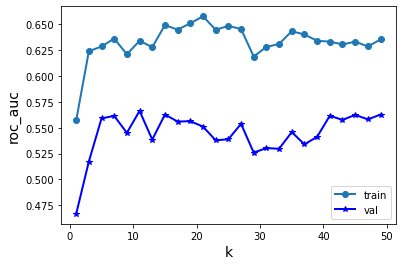

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.566
Valor correspondiente para el hiperparámetro: {'n_neighbors': 11}
0.5384615384615384
Sensibilidad y Accuracy 1.0 0.5384615384615384


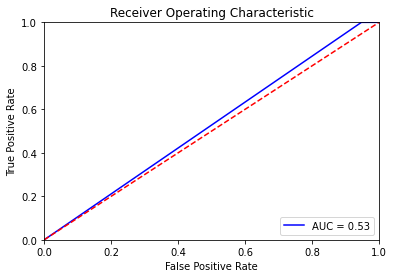

(155, 7) (155,) (39, 7) (39,)


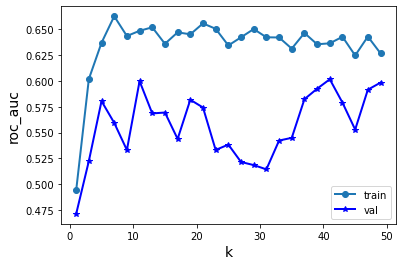

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.602
Valor correspondiente para el hiperparámetro: {'n_neighbors': 41}
0.5641025641025641
Sensibilidad y Accuracy 0.95 0.5641025641025641


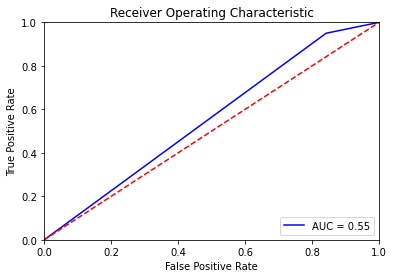

(155, 7) (155,) (39, 7) (39,)


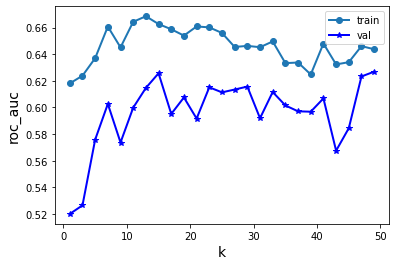

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.627
Valor correspondiente para el hiperparámetro: {'n_neighbors': 49}
0.5384615384615384
Sensibilidad y Accuracy 0.9 0.5384615384615384


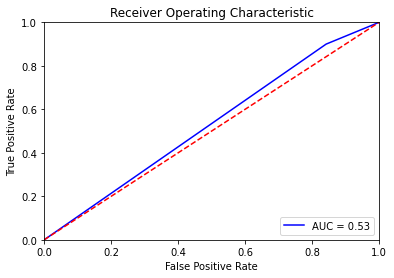

(155, 7) (155,) (39, 7) (39,)


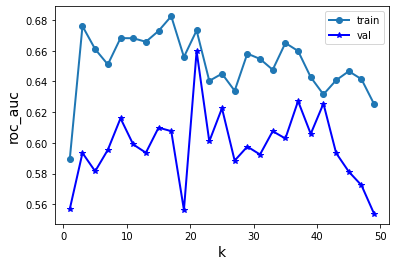

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.660
Valor correspondiente para el hiperparámetro: {'n_neighbors': 21}
0.5128205128205128
Sensibilidad y Accuracy 0.95 0.5128205128205128


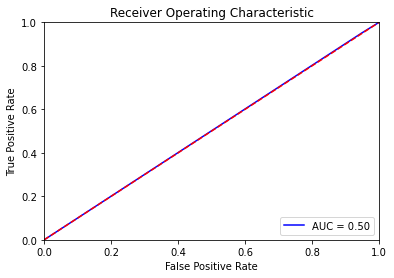

(155, 7) (155,) (39, 7) (39,)


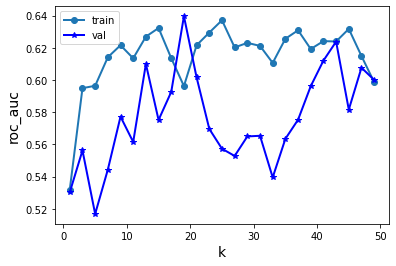

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.640
Valor correspondiente para el hiperparámetro: {'n_neighbors': 19}
0.5384615384615384
Sensibilidad y Accuracy 0.7 0.5384615384615384


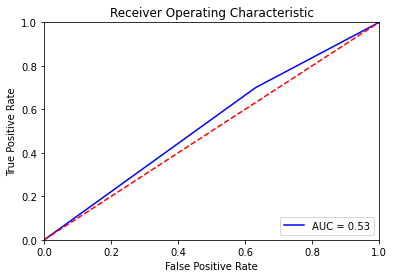

[1.0, 0.95, 0.9, 0.95, 0.7] [0.5384615384615384, 0.5641025641025641, 0.5384615384615384, 0.5128205128205128, 0.5384615384615384] [0.5263157894736843, 0.5539473684210526, 0.5289473684210527, 0.5013157894736842, 0.5342105263157895]


In [68]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
especificidad = []


for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = knn(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    especificidad.append(b[3])



print(sensi, accuracy, roc)

In [69]:
import statistics
media_knn = statistics.mean(accuracy) # 7
desviacion_estandar_knn = statistics.stdev(accuracy) # 5.164...


model_FS.append("KNN")
mean_FS.append(media_knn)
std_FS.append(desviacion_estandar_knn)
print(media_knn, desviacion_estandar_knn)



media_knn2 = statistics.mean(roc) # 7
desviacion_estandar_knn2 = statistics.stdev(roc) # 5.164...


model2_FS.append("KNN")
mean2_FS.append(media_knn2)
std2_FS.append(desviacion_estandar_knn2)
print(media_knn2, desviacion_estandar_knn2)
print(media_knn3, desviacion_estandar_knn3)
media_knn4 = statistics.mean(especificidad) # 7
desviacion_estandar_knn4 = statistics.stdev(especificidad) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.5384615384615384 0.018130943107347388
0.5289473684210526 0.018862198930041398
0.64 0.4929503017546495
0.15789473684210525 0.128920512778062


# SVC 

(155, 15) (155,) (39, 15) (39,)
Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.610
0.5128205128205128
[[ 0 19]
 [ 0 20]]
Sensibilidad y Accuracy 1.0 0.5128205128205128


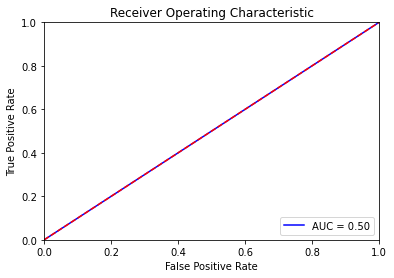

(155, 15) (155,) (39, 15) (39,)
Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.617
0.358974358974359
[[ 8 11]
 [14  6]]
Sensibilidad y Accuracy 0.3 0.358974358974359


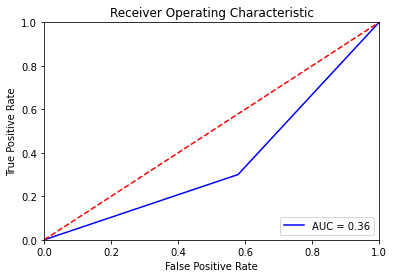

(155, 15) (155,) (39, 15) (39,)
Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.630
0.5128205128205128
[[ 0 19]
 [ 0 20]]
Sensibilidad y Accuracy 1.0 0.5128205128205128


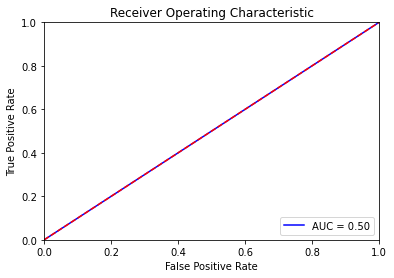

(155, 15) (155,) (39, 15) (39,)
Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.681
0.358974358974359
[[ 4 15]
 [10 10]]
Sensibilidad y Accuracy 0.5 0.358974358974359


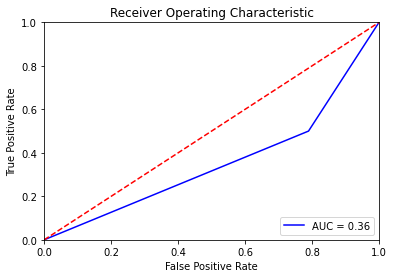

(155, 15) (155,) (39, 15) (39,)
Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.651
0.5641025641025641
[[ 8 11]
 [ 6 14]]
Sensibilidad y Accuracy 0.7 0.5641025641025641


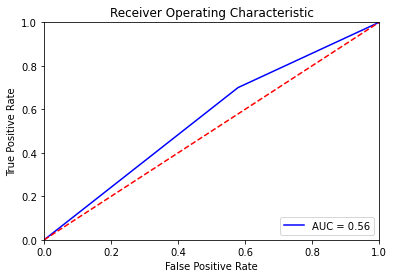

In [70]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
especificidad = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS2, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = svc(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    especificidad.append(b[3])

In [71]:
media_svc = statistics.mean(accuracy) # 7
desviacion_svc = statistics.stdev(accuracy) # 5.164...


model_FS.append("SVM")
mean_FS.append(media_svc)
std_FS.append(desviacion_svc)
print(media_svc, desviacion_svc)


media_svc2 = statistics.mean(roc) # 7
desviacion_estandar_svc2 = statistics.stdev(roc) # 5.164...
print(media_svc2, desviacion_estandar_svc2 )


model2_FS.append("SVM")
mean2_FS.append(media_svc2)
std2_FS.append(desviacion_estandar_svc2)

media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)
media_knn4 = statistics.mean(especificidad) # 7
desviacion_estandar_knn4 = statistics.stdev(especificidad) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.4615384615384615 0.09593993299420361
0.4552631578947368 0.09227428101203546
0.7 0.3082207001484488
0.21052631578947367 0.21052631578947367


# Decision Tree

(155, 7) (155,) (39, 7) (39,)
     Coronary artery disease  Type I diabetes mellitus  Hypertension  \
55                         1                         0             0   
26                         0                         0             0   
79                         0                         0             0   
128                        0                         0             1   
66                         0                         0             0   
..                       ...                       ...           ...   
126                        1                         0             1   
10                         0                         0             0   
54                         0                         0             0   
153                        0                         1             1   
131                        0                         0             1   

     Hearing loss  Prostate cancer  Lung nodule  Hysterectomy  
55              0                0       

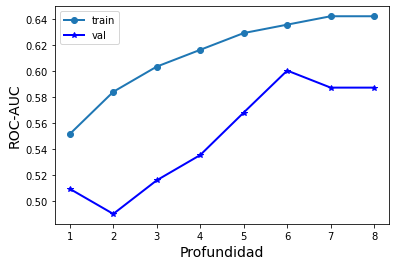

Mejor ROC-AUC en validación cruzada: 0.600
Mejor valor del hiperparámetro: {'max_depth': 6}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 0, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=0), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5384615384615384
[[ 1 18]
 [ 0 20]]
Sensibilidad y Accuracy 1.0 0.5384615384615384


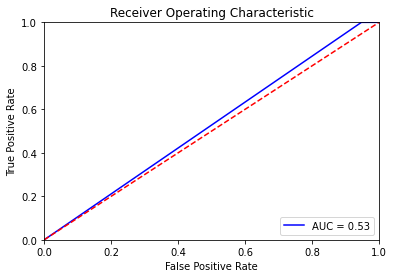

(155, 7) (155,) (39, 7) (39,)
     Coronary artery disease  Type I diabetes mellitus  Hypertension  \
108                        1                         0             1   
6                          0                         0             0   
94                         0                         0             0   
80                         0                         0             1   
111                        0                         0             0   
..                       ...                       ...           ...   
61                         0                         0             1   
109                        0                         0             1   
69                         0                         0             0   
186                        1                         1             1   
115                        0                         0             0   

     Hearing loss  Prostate cancer  Lung nodule  Hysterectomy  
108             0                0       

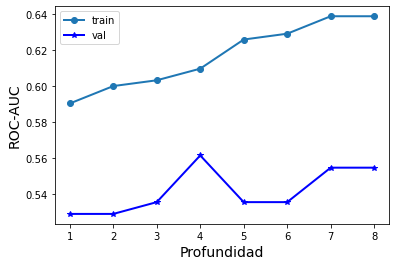

Mejor ROC-AUC en validación cruzada: 0.562
Mejor valor del hiperparámetro: {'max_depth': 4}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=1), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5897435897435898
[[ 4 15]
 [ 1 19]]
Sensibilidad y Accuracy 0.95 0.5897435897435898


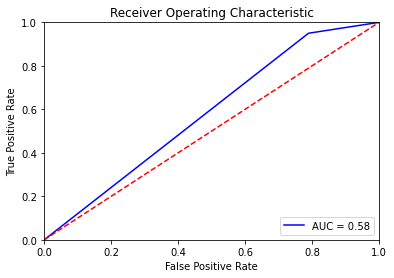

(155, 7) (155,) (39, 7) (39,)
     Coronary artery disease  Type I diabetes mellitus  Hypertension  \
118                        0                         0             1   
109                        0                         0             1   
46                         0                         0             1   
18                         0                         0             0   
182                        0                         1             0   
..                       ...                       ...           ...   
61                         0                         0             1   
160                        0                         0             1   
145                        0                         0             1   
103                        0                         0             0   
38                         0                         0             1   

     Hearing loss  Prostate cancer  Lung nodule  Hysterectomy  
118             0                0       

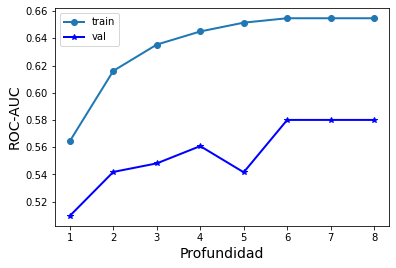

Mejor ROC-AUC en validación cruzada: 0.580
Mejor valor del hiperparámetro: {'max_depth': 6}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 2, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=2), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.4358974358974359
[[ 6 13]
 [ 9 11]]
Sensibilidad y Accuracy 0.55 0.4358974358974359


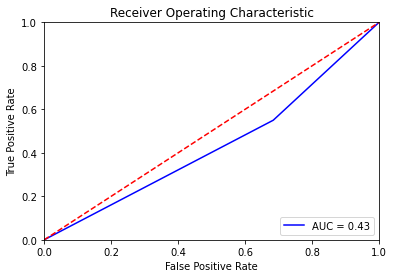

(155, 7) (155,) (39, 7) (39,)
     Coronary artery disease  Type I diabetes mellitus  Hypertension  \
149                        0                         0             0   
138                        0                         0             1   
114                        0                         0             1   
175                        0                         0             0   
174                        0                         0             0   
..                       ...                       ...           ...   
107                        0                         0             1   
108                        1                         0             1   
162                        1                         0             0   
102                        0                         0             1   
165                        0                         0             0   

     Hearing loss  Prostate cancer  Lung nodule  Hysterectomy  
149             0                0       

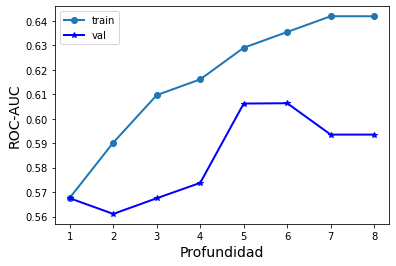

Mejor ROC-AUC en validación cruzada: 0.606
Mejor valor del hiperparámetro: {'max_depth': 6}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 3, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=3), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5384615384615384
[[ 3 16]
 [ 2 18]]
Sensibilidad y Accuracy 0.9 0.5384615384615384


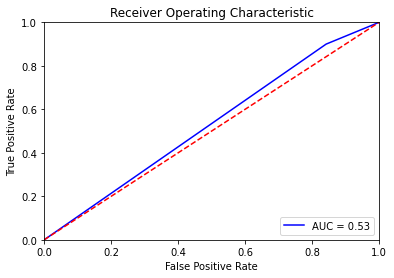

(155, 7) (155,) (39, 7) (39,)
     Coronary artery disease  Type I diabetes mellitus  Hypertension  \
71                         0                         0             1   
11                         0                         0             1   
178                        0                         1             1   
124                        0                         0             1   
102                        0                         0             1   
..                       ...                       ...           ...   
94                         0                         0             0   
137                        1                         0             1   
53                         0                         1             1   
20                         0                         0             0   
138                        0                         0             1   

     Hearing loss  Prostate cancer  Lung nodule  Hysterectomy  
71              0                0       

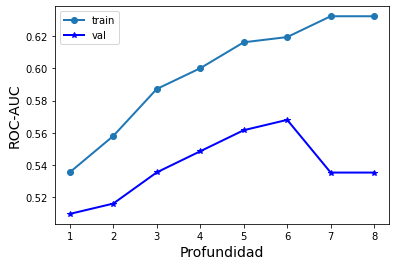

Mejor ROC-AUC en validación cruzada: 0.568
Mejor valor del hiperparámetro: {'max_depth': 6}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 4, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=4), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5897435897435898
[[ 4 15]
 [ 1 19]]
Sensibilidad y Accuracy 0.95 0.5897435897435898


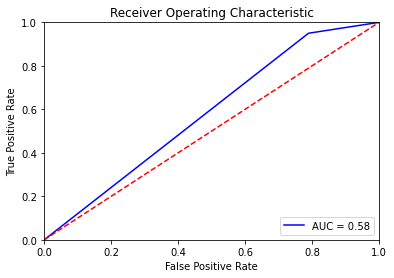

In [72]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = decisionTree(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])

In [73]:
import statistics
media_sen_logarit_FS = statistics.mean(accuracy) # 7
desviacion_estandar_sen_logarit_FS = statistics.stdev(accuracy) # 5.164...
print(media_sen_logarit_FS, desviacion_estandar_sen_logarit_FS)

model_FS.append("DT")
mean_FS.append(media_sen_logarit_FS)

std_FS.append(desviacion_estandar_sen_logarit_FS)

0.5384615384615384 0.06280742930213278


In [74]:
media_log = statistics.mean(roc) # 7
desviacion_estandar_log = statistics.stdev(roc) # 5.164...


model2_FS.append("DT")
mean2_FS.append(media_log)
std2_FS.append(desviacion_estandar_log)


print(media_log, desviacion_estandar_log)


media_des3 = statistics.mean(sensi) # 7
desviacion_des_knn3 = statistics.stdev(sensi) # 5.164...

print(media_des3, desviacion_des_knn3)

0.5297368421052632 0.06020078362472094
0.87 0.18234582528810467


In [75]:
media_knn4 = statistics.mean(especificidad) # 7
desviacion_estandar_knn4 = statistics.stdev(especificidad) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.21052631578947367 0.21052631578947367


# Regresión logística

# Reg. Logística Lasso

(155, 7) (155,) (39, 7) (39,)
{'C': 5}
0.5354838709677419
[[ 1 18]
 [ 0 20]]
tn: 1, fp:18, fn:0, tp:20
Accuracy: 0.5384615384615384
              precision    recall  f1-score   support

Non-diabetic       1.00      0.05      0.10        19
    Diabetic       0.53      1.00      0.69        20

    accuracy                           0.54        39
   macro avg       0.76      0.53      0.39        39
weighted avg       0.76      0.54      0.40        39

Sensibilidad: 1.0


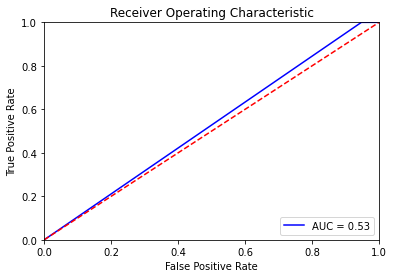

(155, 7) (155,) (39, 7) (39,)
{'C': 5}
0.5612903225806452
[[ 9 10]
 [12  8]]
tn: 9, fp:10, fn:12, tp:8
Accuracy: 0.4358974358974359
              precision    recall  f1-score   support

Non-diabetic       0.43      0.47      0.45        19
    Diabetic       0.44      0.40      0.42        20

    accuracy                           0.44        39
   macro avg       0.44      0.44      0.44        39
weighted avg       0.44      0.44      0.44        39

Sensibilidad: 0.4


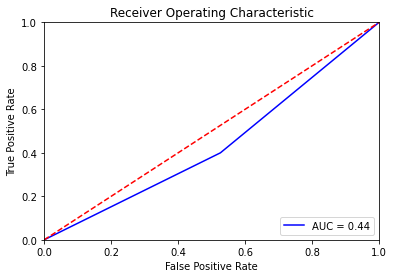

(155, 7) (155,) (39, 7) (39,)
{'C': 1}
0.6
[[ 6 13]
 [ 8 12]]
tn: 6, fp:13, fn:8, tp:12
Accuracy: 0.46153846153846156
              precision    recall  f1-score   support

Non-diabetic       0.43      0.32      0.36        19
    Diabetic       0.48      0.60      0.53        20

    accuracy                           0.46        39
   macro avg       0.45      0.46      0.45        39
weighted avg       0.45      0.46      0.45        39

Sensibilidad: 0.6


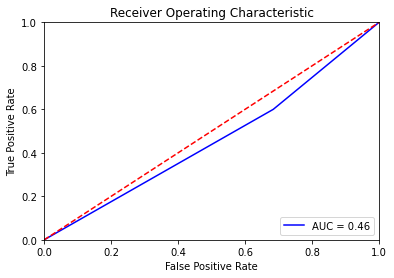

(155, 7) (155,) (39, 7) (39,)
{'C': 5}
0.6193548387096774
[[ 6 13]
 [ 9 11]]
tn: 6, fp:13, fn:9, tp:11
Accuracy: 0.4358974358974359
              precision    recall  f1-score   support

Non-diabetic       0.40      0.32      0.35        19
    Diabetic       0.46      0.55      0.50        20

    accuracy                           0.44        39
   macro avg       0.43      0.43      0.43        39
weighted avg       0.43      0.44      0.43        39

Sensibilidad: 0.55


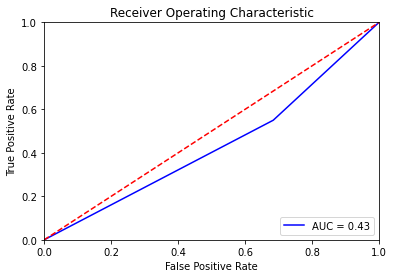

(155, 7) (155,) (39, 7) (39,)
{'C': 10}
0.5548387096774193
[[ 8 11]
 [ 6 14]]
tn: 8, fp:11, fn:6, tp:14
Accuracy: 0.5641025641025641
              precision    recall  f1-score   support

Non-diabetic       0.57      0.42      0.48        19
    Diabetic       0.56      0.70      0.62        20

    accuracy                           0.56        39
   macro avg       0.57      0.56      0.55        39
weighted avg       0.57      0.56      0.56        39

Sensibilidad: 0.7


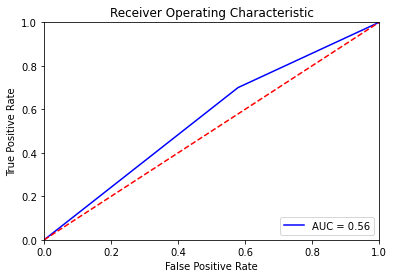

In [76]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
especificidad = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = reg_Lasso(X_train, X_test, Y_train, Y_test)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    especificidad.append(b[3])

In [77]:
media_lasso = statistics.mean(accuracy) # 7
desviacion_estandar_lasso = statistics.stdev(accuracy) # 5.164...


model_FS.append("LASSO")
mean_FS.append(media_lasso)
std_FS.append(desviacion_estandar_lasso)
print(media_lasso, desviacion_estandar_lasso)

media_lasso2 = statistics.mean(roc) # 7
desviacion_estandar_lasso2 = statistics.stdev(roc) # 5.164...
print(media_lasso2, desviacion_estandar_lasso2)

model2_FS.append("LASSO")
mean2_FS.append(media_lasso2)
std2_FS.append(desviacion_estandar_lasso2)


media_lasso3 = statistics.mean(sensi) # 7
desviacion_estandar_lasso3 = statistics.stdev(sensi) # 5.164...
print(media_lasso3, desviacion_estandar_lasso3)
media_knn4 = statistics.mean(especificidad) # 7
desviacion_estandar_knn4 = statistics.stdev(especificidad) # 5.164...



0.48717948717948717 0.06013353538235165
0.48289473684210527 0.05735393346764045
0.65 0.22360679774997896


In [78]:
print(media_knn4, desviacion_estandar_knn4)

0.3157894736842105 0.16222142113076254


In [79]:
df_metrics = pd.DataFrame()


df_metrics["model"] = model_FS
df_metrics["mean"] = mean_FS
df_metrics["std"] = std_FS

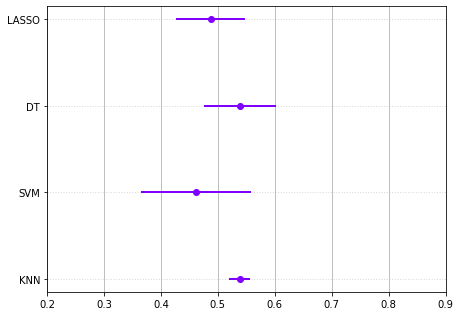

In [80]:
plot_mean_std_metric(df_metrics, lims=(0.2, 0.9), title_figure='', flag_save_figure=True)


In [81]:
df_metrics2 = pd.DataFrame()


df_metrics2["model"] = model2_FS
df_metrics2["mean"] = mean2_FS
df_metrics2["std"] = std2_FS

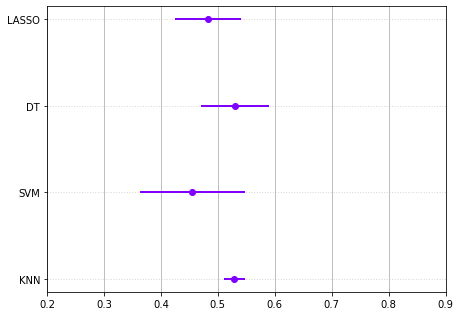

In [82]:
plot_mean_std_metric(df_metrics2, lims=(0.2, 0.9), title_figure='',flag_save_figure=True)